In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import time

In [2]:
from keras.models import load_model
model = load_model('cnn_best_model.h5')

In [ ]:
#load the balanced data
df = pd.read_csv('UNSW_NB15_balanced_smote.csv')

In [6]:
X = df.drop(['attack_cat','label'], axis=1)
y = df['attack_cat']
# one hot encoding
y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# convert to numpy array
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [7]:
X_test2 = np.squeeze(X_test)
X_test2.shape
X_train2 = np.squeeze(X_train)
X_train2.shape

(446400, 196)

In [9]:
#use SHAP to explain the model
import tensorflow as tf
import shap
shap.initjs()
explainer = shap.KernelExplainer(model.predict, X_train2[0:100])
shape_values = explainer.shap_values(X_test2[0:1000])

4/4 [==============================] - 0s 10ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

6813/6813 [==============================] - 27s 4ms/step


  0%|          | 1/1000 [00:31<8:36:09, 31.00s/it]

6813/6813 [==============================] - 27s 4ms/step


  0%|          | 2/1000 [01:02<8:39:12, 31.22s/it]

6819/6819 [==============================] - 27s 4ms/step


  0%|          | 3/1000 [01:34<8:46:06, 31.66s/it]

6813/6813 [==============================] - 27s 4ms/step


  0%|          | 4/1000 [02:06<8:47:17, 31.76s/it]

6813/6813 [==============================] - 27s 4ms/step


  0%|          | 5/1000 [02:38<8:46:39, 31.76s/it]

6813/6813 [==============================] - 27s 4ms/step


  1%|          | 6/1000 [03:10<8:47:21, 31.83s/it]

6813/6813 [==============================] - 27s 4ms/step


  1%|          | 7/1000 [03:41<8:46:27, 31.81s/it]

6813/6813 [==============================] - 27s 4ms/step


  1%|          | 8/1000 [04:13<8:45:53, 31.81s/it]

6813/6813 [==============================] - 27s 4ms/step


  1%|          | 9/1000 [04:45<8:43:29, 31.69s/it]

6813/6813 [==============================] - 31s 5ms/step


  1%|          | 10/1000 [05:20<9:03:16, 32.93s/it]

6813/6813 [==============================] - 29s 4ms/step


  1%|          | 11/1000 [05:55<9:10:05, 33.37s/it]

6813/6813 [==============================] - 30s 4ms/step


  1%|          | 12/1000 [06:30<9:18:08, 33.89s/it]

6819/6819 [==============================] - 29s 4ms/step


  1%|▏         | 13/1000 [07:04<9:18:35, 33.96s/it]

6813/6813 [==============================] - 31s 5ms/step


  1%|▏         | 14/1000 [07:40<9:27:18, 34.52s/it]

6813/6813 [==============================] - 31s 5ms/step


  2%|▏         | 15/1000 [08:16<9:33:40, 34.94s/it]

6813/6813 [==============================] - 31s 5ms/step


  2%|▏         | 16/1000 [08:51<9:36:27, 35.15s/it]

6819/6819 [==============================] - 31s 5ms/step


  2%|▏         | 17/1000 [09:28<9:40:59, 35.46s/it]

6819/6819 [==============================] - 31s 5ms/step


  2%|▏         | 18/1000 [10:03<9:41:15, 35.51s/it]

6825/6825 [==============================] - 30s 4ms/step


  2%|▏         | 19/1000 [10:38<9:38:10, 35.36s/it]

6825/6825 [==============================] - 28s 4ms/step


  2%|▏         | 20/1000 [11:10<9:21:07, 34.35s/it]

6813/6813 [==============================] - 28s 4ms/step


  2%|▏         | 21/1000 [11:42<9:09:12, 33.66s/it]

6813/6813 [==============================] - 28s 4ms/step


  2%|▏         | 22/1000 [12:14<9:01:35, 33.23s/it]

6819/6819 [==============================] - 27s 4ms/step


  2%|▏         | 23/1000 [12:46<8:55:02, 32.86s/it]

6813/6813 [==============================] - 28s 4ms/step


  2%|▏         | 24/1000 [13:19<8:50:47, 32.63s/it]

6813/6813 [==============================] - 28s 4ms/step


  2%|▎         | 25/1000 [13:51<8:47:15, 32.45s/it]

6813/6813 [==============================] - 28s 4ms/step


  3%|▎         | 26/1000 [14:23<8:45:11, 32.35s/it]

6813/6813 [==============================] - 28s 4ms/step


  3%|▎         | 27/1000 [14:55<8:42:55, 32.25s/it]

6813/6813 [==============================] - 27s 4ms/step


  3%|▎         | 28/1000 [15:26<8:39:46, 32.08s/it]

6813/6813 [==============================] - 27s 4ms/step


  3%|▎         | 29/1000 [15:58<8:36:59, 31.95s/it]

6813/6813 [==============================] - 27s 4ms/step


  3%|▎         | 30/1000 [16:30<8:34:14, 31.81s/it]

6813/6813 [==============================] - 28s 4ms/step


  3%|▎         | 31/1000 [17:01<8:34:23, 31.85s/it]

6819/6819 [==============================] - 27s 4ms/step


  3%|▎         | 32/1000 [17:33<8:33:46, 31.85s/it]

6813/6813 [==============================] - 27s 4ms/step


  3%|▎         | 33/1000 [18:05<8:32:40, 31.81s/it]

6813/6813 [==============================] - 28s 4ms/step


  3%|▎         | 34/1000 [18:37<8:33:30, 31.89s/it]

6813/6813 [==============================] - 27s 4ms/step


  4%|▎         | 35/1000 [19:09<8:33:45, 31.94s/it]

6813/6813 [==============================] - 27s 4ms/step


  4%|▎         | 36/1000 [19:41<8:31:25, 31.83s/it]

6813/6813 [==============================] - 27s 4ms/step


  4%|▎         | 37/1000 [20:12<8:30:04, 31.78s/it]

6813/6813 [==============================] - 27s 4ms/step


  4%|▍         | 38/1000 [20:44<8:28:42, 31.73s/it]

6813/6813 [==============================] - 28s 4ms/step


  4%|▍         | 39/1000 [21:16<8:31:17, 31.92s/it]

6813/6813 [==============================] - 27s 4ms/step


  4%|▍         | 40/1000 [21:48<8:29:04, 31.82s/it]

6813/6813 [==============================] - 27s 4ms/step


  4%|▍         | 41/1000 [22:20<8:29:12, 31.86s/it]

6813/6813 [==============================] - 28s 4ms/step


  4%|▍         | 42/1000 [22:52<8:30:40, 31.98s/it]

6813/6813 [==============================] - 28s 4ms/step


  4%|▍         | 43/1000 [23:24<8:27:52, 31.84s/it]

6813/6813 [==============================] - 27s 4ms/step


  4%|▍         | 44/1000 [23:55<8:26:10, 31.77s/it]

6813/6813 [==============================] - 27s 4ms/step


  4%|▍         | 45/1000 [24:27<8:26:28, 31.82s/it]

6813/6813 [==============================] - 28s 4ms/step


  5%|▍         | 46/1000 [24:59<8:23:59, 31.70s/it]

6813/6813 [==============================] - 27s 4ms/step


  5%|▍         | 47/1000 [25:31<8:24:30, 31.76s/it]

6825/6825 [==============================] - 28s 4ms/step


  5%|▍         | 48/1000 [26:02<8:24:40, 31.81s/it]

6825/6825 [==============================] - 28s 4ms/step


  5%|▍         | 49/1000 [26:35<8:27:14, 32.00s/it]

6813/6813 [==============================] - 28s 4ms/step


  5%|▌         | 50/1000 [27:07<8:27:56, 32.08s/it]

6813/6813 [==============================] - 28s 4ms/step


  5%|▌         | 51/1000 [27:39<8:27:32, 32.09s/it]

6819/6819 [==============================] - 28s 4ms/step


  5%|▌         | 52/1000 [28:11<8:27:06, 32.10s/it]

6813/6813 [==============================] - 28s 4ms/step


  5%|▌         | 53/1000 [28:44<8:27:19, 32.14s/it]

6813/6813 [==============================] - 28s 4ms/step


  5%|▌         | 54/1000 [29:16<8:28:24, 32.25s/it]

6813/6813 [==============================] - 28s 4ms/step


  6%|▌         | 55/1000 [29:49<8:28:47, 32.30s/it]

6813/6813 [==============================] - 28s 4ms/step


  6%|▌         | 56/1000 [30:21<8:26:51, 32.22s/it]

6813/6813 [==============================] - 27s 4ms/step


  6%|▌         | 57/1000 [30:52<8:23:17, 32.02s/it]

6813/6813 [==============================] - 28s 4ms/step


  6%|▌         | 58/1000 [31:25<8:24:35, 32.14s/it]

6813/6813 [==============================] - 27s 4ms/step


  6%|▌         | 59/1000 [31:56<8:21:35, 31.98s/it]

6813/6813 [==============================] - 28s 4ms/step


  6%|▌         | 60/1000 [32:28<8:21:06, 31.99s/it]

6813/6813 [==============================] - 27s 4ms/step


  6%|▌         | 61/1000 [33:00<8:19:54, 31.94s/it]

6813/6813 [==============================] - 28s 4ms/step


  6%|▌         | 62/1000 [33:32<8:20:53, 32.04s/it]

6813/6813 [==============================] - 27s 4ms/step


  6%|▋         | 63/1000 [34:04<8:20:46, 32.07s/it]

6813/6813 [==============================] - 28s 4ms/step


  6%|▋         | 64/1000 [34:36<8:20:09, 32.06s/it]

6813/6813 [==============================] - 27s 4ms/step


  6%|▋         | 65/1000 [35:08<8:17:34, 31.93s/it]

6813/6813 [==============================] - 27s 4ms/step


  7%|▋         | 66/1000 [35:39<8:14:04, 31.74s/it]

6813/6813 [==============================] - 28s 4ms/step


  7%|▋         | 67/1000 [36:12<8:15:16, 31.85s/it]

6813/6813 [==============================] - 27s 4ms/step


  7%|▋         | 68/1000 [36:43<8:14:58, 31.86s/it]

6813/6813 [==============================] - 28s 4ms/step


  7%|▋         | 69/1000 [37:15<8:15:05, 31.91s/it]

6825/6825 [==============================] - 28s 4ms/step


  7%|▋         | 70/1000 [37:48<8:16:02, 32.00s/it]

6819/6819 [==============================] - 28s 4ms/step


  7%|▋         | 71/1000 [38:20<8:16:31, 32.07s/it]

6813/6813 [==============================] - 28s 4ms/step


  7%|▋         | 72/1000 [38:52<8:17:18, 32.15s/it]

6813/6813 [==============================] - 28s 4ms/step


  7%|▋         | 73/1000 [39:24<8:16:52, 32.16s/it]

6813/6813 [==============================] - 28s 4ms/step


  7%|▋         | 74/1000 [39:57<8:16:37, 32.18s/it]

6813/6813 [==============================] - 28s 4ms/step


  8%|▊         | 75/1000 [40:29<8:15:50, 32.16s/it]

6825/6825 [==============================] - 28s 4ms/step


  8%|▊         | 76/1000 [41:01<8:17:57, 32.34s/it]

6813/6813 [==============================] - 27s 4ms/step


  8%|▊         | 77/1000 [41:33<8:13:39, 32.09s/it]

6819/6819 [==============================] - 28s 4ms/step


  8%|▊         | 78/1000 [42:05<8:13:46, 32.13s/it]

6813/6813 [==============================] - 28s 4ms/step


  8%|▊         | 79/1000 [42:37<8:10:25, 31.95s/it]

6813/6813 [==============================] - 28s 4ms/step


  8%|▊         | 80/1000 [43:09<8:09:55, 31.95s/it]

6813/6813 [==============================] - 28s 4ms/step


  8%|▊         | 81/1000 [43:41<8:09:23, 31.95s/it]

6813/6813 [==============================] - 28s 4ms/step


  8%|▊         | 82/1000 [44:13<8:10:01, 32.03s/it]

6813/6813 [==============================] - 28s 4ms/step


  8%|▊         | 83/1000 [44:45<8:09:18, 32.02s/it]

6813/6813 [==============================] - 27s 4ms/step


  8%|▊         | 84/1000 [45:17<8:09:06, 32.04s/it]

6813/6813 [==============================] - 28s 4ms/step


  8%|▊         | 85/1000 [45:49<8:09:29, 32.10s/it]

6813/6813 [==============================] - 28s 4ms/step


  9%|▊         | 86/1000 [46:21<8:09:50, 32.16s/it]

6813/6813 [==============================] - 28s 4ms/step


  9%|▊         | 87/1000 [46:54<8:09:21, 32.16s/it]

6813/6813 [==============================] - 28s 4ms/step


  9%|▉         | 88/1000 [47:26<8:09:02, 32.17s/it]

6819/6819 [==============================] - 28s 4ms/step


  9%|▉         | 89/1000 [47:58<8:10:13, 32.29s/it]

6813/6813 [==============================] - 32s 5ms/step


  9%|▉         | 90/1000 [48:37<8:37:07, 34.10s/it]

6813/6813 [==============================] - 40s 6ms/step


  9%|▉         | 91/1000 [49:23<9:30:45, 37.67s/it]

6813/6813 [==============================] - 31s 5ms/step


  9%|▉         | 92/1000 [49:59<9:25:27, 37.36s/it]

6813/6813 [==============================] - 29s 4ms/step


  9%|▉         | 93/1000 [50:33<9:07:10, 36.20s/it]

6813/6813 [==============================] - 28s 4ms/step


  9%|▉         | 94/1000 [51:06<8:51:58, 35.23s/it]

6813/6813 [==============================] - 29s 4ms/step


 10%|▉         | 95/1000 [51:39<8:42:10, 34.62s/it]

6813/6813 [==============================] - 28s 4ms/step


 10%|▉         | 96/1000 [52:12<8:35:49, 34.24s/it]

6819/6819 [==============================] - 29s 4ms/step


 10%|▉         | 97/1000 [52:46<8:33:13, 34.10s/it]

6813/6813 [==============================] - 30s 4ms/step


 10%|▉         | 98/1000 [53:21<8:34:17, 34.21s/it]

6813/6813 [==============================] - 30s 4ms/step


 10%|▉         | 99/1000 [53:55<8:35:37, 34.34s/it]

6813/6813 [==============================] - 31s 5ms/step


 10%|█         | 100/1000 [54:31<8:40:40, 34.71s/it]

6813/6813 [==============================] - 31s 5ms/step


 10%|█         | 101/1000 [55:06<8:42:04, 34.84s/it]

6813/6813 [==============================] - 32s 5ms/step


 10%|█         | 102/1000 [55:42<8:46:38, 35.19s/it]

6813/6813 [==============================] - 29s 4ms/step


 10%|█         | 103/1000 [56:15<8:38:21, 34.67s/it]

6819/6819 [==============================] - 29s 4ms/step


 10%|█         | 104/1000 [56:49<8:31:46, 34.27s/it]

6813/6813 [==============================] - 29s 4ms/step


 10%|█         | 105/1000 [57:22<8:27:37, 34.03s/it]

6813/6813 [==============================] - 30s 4ms/step


 11%|█         | 106/1000 [57:56<8:27:51, 34.08s/it]

6813/6813 [==============================] - 29s 4ms/step


 11%|█         | 107/1000 [58:30<8:24:56, 33.93s/it]

6813/6813 [==============================] - 31s 4ms/step


 11%|█         | 108/1000 [59:05<8:29:31, 34.27s/it]

6813/6813 [==============================] - 31s 5ms/step


 11%|█         | 109/1000 [59:41<8:34:32, 34.65s/it]

6813/6813 [==============================] - 30s 4ms/step


 11%|█         | 110/1000 [1:00:15<8:32:41, 34.56s/it]

6813/6813 [==============================] - 29s 4ms/step


 11%|█         | 111/1000 [1:00:48<8:25:24, 34.11s/it]

6813/6813 [==============================] - 29s 4ms/step


 11%|█         | 112/1000 [1:01:22<8:23:12, 34.00s/it]

6813/6813 [==============================] - 30s 4ms/step


 11%|█▏        | 113/1000 [1:01:56<8:23:57, 34.09s/it]

6813/6813 [==============================] - 30s 4ms/step


 11%|█▏        | 114/1000 [1:02:30<8:24:21, 34.15s/it]

6813/6813 [==============================] - 29s 4ms/step


 12%|█▏        | 115/1000 [1:03:04<8:23:14, 34.12s/it]

6813/6813 [==============================] - 29s 4ms/step


 12%|█▏        | 116/1000 [1:03:38<8:20:13, 33.95s/it]

6813/6813 [==============================] - 29s 4ms/step


 12%|█▏        | 117/1000 [1:04:11<8:15:39, 33.68s/it]

6813/6813 [==============================] - 37s 5ms/step


 12%|█▏        | 118/1000 [1:04:53<8:52:16, 36.21s/it]

6813/6813 [==============================] - 35s 5ms/step


 12%|█▏        | 119/1000 [1:05:33<9:08:52, 37.38s/it]

6813/6813 [==============================] - 33s 5ms/step


 12%|█▏        | 120/1000 [1:06:12<9:12:13, 37.65s/it]

6819/6819 [==============================] - 35s 5ms/step


 12%|█▏        | 121/1000 [1:06:51<9:18:42, 38.14s/it]

6819/6819 [==============================] - 35s 5ms/step


 12%|█▏        | 122/1000 [1:07:30<9:22:49, 38.46s/it]

6813/6813 [==============================] - 34s 5ms/step


 12%|█▏        | 123/1000 [1:08:09<9:24:14, 38.60s/it]

6813/6813 [==============================] - 36s 5ms/step


 12%|█▏        | 124/1000 [1:08:49<9:31:20, 39.13s/it]

6819/6819 [==============================] - 36s 5ms/step


 12%|█▎        | 125/1000 [1:09:30<9:35:44, 39.48s/it]

6813/6813 [==============================] - 32s 5ms/step


 13%|█▎        | 126/1000 [1:10:06<9:22:06, 38.59s/it]

6813/6813 [==============================] - 30s 4ms/step


 13%|█▎        | 127/1000 [1:10:41<9:05:51, 37.52s/it]

6813/6813 [==============================] - 30s 4ms/step


 13%|█▎        | 128/1000 [1:11:15<8:50:33, 36.51s/it]

6813/6813 [==============================] - 29s 4ms/step


 13%|█▎        | 129/1000 [1:11:49<8:38:02, 35.69s/it]

6819/6819 [==============================] - 30s 4ms/step


 13%|█▎        | 130/1000 [1:12:24<8:34:46, 35.50s/it]

6813/6813 [==============================] - 30s 4ms/step


 13%|█▎        | 131/1000 [1:12:59<8:30:56, 35.28s/it]

6813/6813 [==============================] - 30s 4ms/step


 13%|█▎        | 132/1000 [1:13:34<8:29:28, 35.22s/it]

6813/6813 [==============================] - 30s 4ms/step


 13%|█▎        | 133/1000 [1:14:08<8:23:54, 34.87s/it]

6813/6813 [==============================] - 31s 5ms/step


 13%|█▎        | 134/1000 [1:14:44<8:26:29, 35.09s/it]

6813/6813 [==============================] - 30s 4ms/step


 14%|█▎        | 135/1000 [1:15:18<8:21:40, 34.80s/it]

6813/6813 [==============================] - 29s 4ms/step


 14%|█▎        | 136/1000 [1:15:52<8:17:04, 34.52s/it]

6819/6819 [==============================] - 30s 4ms/step


 14%|█▎        | 137/1000 [1:16:26<8:15:23, 34.44s/it]

6813/6813 [==============================] - 29s 4ms/step


 14%|█▍        | 138/1000 [1:16:59<8:10:53, 34.17s/it]

6819/6819 [==============================] - 29s 4ms/step


 14%|█▍        | 139/1000 [1:17:33<8:07:35, 33.98s/it]

6813/6813 [==============================] - 29s 4ms/step


 14%|█▍        | 140/1000 [1:18:06<8:04:47, 33.82s/it]

6813/6813 [==============================] - 29s 4ms/step


 14%|█▍        | 141/1000 [1:18:40<8:04:47, 33.86s/it]

6813/6813 [==============================] - 28s 4ms/step


 14%|█▍        | 142/1000 [1:19:13<7:58:57, 33.49s/it]

6813/6813 [==============================] - 28s 4ms/step


 14%|█▍        | 143/1000 [1:19:45<7:52:22, 33.07s/it]

6813/6813 [==============================] - 29s 4ms/step


 14%|█▍        | 144/1000 [1:20:18<7:52:36, 33.13s/it]

6813/6813 [==============================] - 28s 4ms/step


 14%|█▍        | 145/1000 [1:20:51<7:49:35, 32.95s/it]

6825/6825 [==============================] - 29s 4ms/step


 15%|█▍        | 146/1000 [1:21:24<7:50:56, 33.09s/it]

6813/6813 [==============================] - 28s 4ms/step


 15%|█▍        | 147/1000 [1:21:57<7:47:37, 32.89s/it]

6813/6813 [==============================] - 29s 4ms/step


 15%|█▍        | 148/1000 [1:22:30<7:50:15, 33.12s/it]

6819/6819 [==============================] - 29s 4ms/step


 15%|█▍        | 149/1000 [1:23:04<7:53:10, 33.36s/it]

6813/6813 [==============================] - 30s 4ms/step


 15%|█▌        | 150/1000 [1:23:39<7:57:54, 33.73s/it]

6813/6813 [==============================] - 30s 4ms/step


 15%|█▌        | 151/1000 [1:24:13<7:59:59, 33.92s/it]

6819/6819 [==============================] - 30s 4ms/step


 15%|█▌        | 152/1000 [1:24:48<8:02:02, 34.11s/it]

6813/6813 [==============================] - 29s 4ms/step


 15%|█▌        | 153/1000 [1:25:22<8:01:06, 34.08s/it]

6813/6813 [==============================] - 29s 4ms/step


 15%|█▌        | 154/1000 [1:25:56<8:00:20, 34.07s/it]

6813/6813 [==============================] - 30s 4ms/step


 16%|█▌        | 155/1000 [1:26:30<7:59:34, 34.05s/it]

6813/6813 [==============================] - 30s 4ms/step


 16%|█▌        | 156/1000 [1:27:04<8:01:02, 34.20s/it]

6813/6813 [==============================] - 30s 4ms/step


 16%|█▌        | 157/1000 [1:27:38<7:59:26, 34.12s/it]

6813/6813 [==============================] - 30s 4ms/step


 16%|█▌        | 158/1000 [1:28:13<8:00:25, 34.24s/it]

6813/6813 [==============================] - 29s 4ms/step


 16%|█▌        | 159/1000 [1:28:46<7:55:03, 33.89s/it]

6813/6813 [==============================] - 29s 4ms/step


 16%|█▌        | 160/1000 [1:29:20<7:54:39, 33.90s/it]

6813/6813 [==============================] - 29s 4ms/step


 16%|█▌        | 161/1000 [1:29:53<7:52:12, 33.77s/it]

6813/6813 [==============================] - 29s 4ms/step


 16%|█▌        | 162/1000 [1:30:27<7:49:42, 33.63s/it]

6813/6813 [==============================] - 29s 4ms/step


 16%|█▋        | 163/1000 [1:31:00<7:50:04, 33.70s/it]

6825/6825 [==============================] - 30s 4ms/step


 16%|█▋        | 164/1000 [1:31:34<7:50:36, 33.78s/it]

6813/6813 [==============================] - 29s 4ms/step


 16%|█▋        | 165/1000 [1:32:08<7:50:45, 33.83s/it]

6819/6819 [==============================] - 27s 4ms/step


 17%|█▋        | 166/1000 [1:32:40<7:42:29, 33.27s/it]

6813/6813 [==============================] - 27s 4ms/step


 17%|█▋        | 167/1000 [1:33:12<7:36:27, 32.88s/it]

6819/6819 [==============================] - 28s 4ms/step


 17%|█▋        | 168/1000 [1:33:45<7:33:08, 32.68s/it]

6813/6813 [==============================] - 27s 4ms/step


 17%|█▋        | 169/1000 [1:34:16<7:28:19, 32.37s/it]

6813/6813 [==============================] - 27s 4ms/step


 17%|█▋        | 170/1000 [1:34:47<7:21:58, 31.95s/it]

6813/6813 [==============================] - 28s 4ms/step


 17%|█▋        | 171/1000 [1:35:20<7:23:05, 32.07s/it]

6813/6813 [==============================] - 27s 4ms/step


 17%|█▋        | 172/1000 [1:35:52<7:23:04, 32.11s/it]

6813/6813 [==============================] - 28s 4ms/step


 17%|█▋        | 173/1000 [1:36:23<7:21:04, 32.00s/it]

6813/6813 [==============================] - 27s 4ms/step


 17%|█▋        | 174/1000 [1:36:55<7:18:44, 31.87s/it]

6819/6819 [==============================] - 27s 4ms/step


 18%|█▊        | 175/1000 [1:37:27<7:18:04, 31.86s/it]

6813/6813 [==============================] - 27s 4ms/step


 18%|█▊        | 176/1000 [1:37:58<7:16:04, 31.75s/it]

6819/6819 [==============================] - 32s 5ms/step


 18%|█▊        | 177/1000 [1:38:35<7:34:25, 33.13s/it]

6813/6813 [==============================] - 32s 5ms/step


 18%|█▊        | 178/1000 [1:39:12<7:51:52, 34.44s/it]

6813/6813 [==============================] - 32s 5ms/step


 18%|█▊        | 179/1000 [1:39:49<7:59:52, 35.07s/it]

6813/6813 [==============================] - 32s 5ms/step


 18%|█▊        | 180/1000 [1:40:26<8:07:49, 35.69s/it]

6819/6819 [==============================] - 32s 5ms/step


 18%|█▊        | 181/1000 [1:41:03<8:13:44, 36.17s/it]

6813/6813 [==============================] - 32s 5ms/step


 18%|█▊        | 182/1000 [1:41:40<8:14:10, 36.25s/it]

6813/6813 [==============================] - 35s 5ms/step


 18%|█▊        | 183/1000 [1:42:19<8:26:44, 37.22s/it]

6813/6813 [==============================] - 31s 5ms/step


 18%|█▊        | 184/1000 [1:42:54<8:18:35, 36.66s/it]

6813/6813 [==============================] - 33s 5ms/step


 18%|█▊        | 185/1000 [1:43:32<8:21:01, 36.89s/it]

6813/6813 [==============================] - 33s 5ms/step


 19%|█▊        | 186/1000 [1:44:10<8:24:05, 37.16s/it]

6813/6813 [==============================] - 30s 4ms/step


 19%|█▊        | 187/1000 [1:44:45<8:14:40, 36.51s/it]

6813/6813 [==============================] - 32s 5ms/step


 19%|█▉        | 188/1000 [1:45:21<8:14:01, 36.50s/it]

6813/6813 [==============================] - 32s 5ms/step


 19%|█▉        | 189/1000 [1:45:58<8:15:35, 36.66s/it]

6813/6813 [==============================] - 30s 4ms/step


 19%|█▉        | 190/1000 [1:46:32<8:04:37, 35.90s/it]

6813/6813 [==============================] - 31s 5ms/step


 19%|█▉        | 191/1000 [1:47:09<8:06:23, 36.07s/it]

6813/6813 [==============================] - 31s 5ms/step


 19%|█▉        | 192/1000 [1:47:45<8:05:39, 36.06s/it]

6813/6813 [==============================] - 33s 5ms/step


 19%|█▉        | 193/1000 [1:48:23<8:13:33, 36.70s/it]

6813/6813 [==============================] - 33s 5ms/step


 19%|█▉        | 194/1000 [1:49:01<8:17:31, 37.04s/it]

6813/6813 [==============================] - 33s 5ms/step


 20%|█▉        | 195/1000 [1:49:38<8:18:18, 37.14s/it]

6813/6813 [==============================] - 32s 5ms/step


 20%|█▉        | 196/1000 [1:50:15<8:15:17, 36.96s/it]

6813/6813 [==============================] - 31s 5ms/step


 20%|█▉        | 197/1000 [1:50:51<8:10:40, 36.66s/it]

6813/6813 [==============================] - 29s 4ms/step


 20%|█▉        | 198/1000 [1:51:25<7:59:44, 35.89s/it]

6813/6813 [==============================] - 29s 4ms/step


 20%|█▉        | 199/1000 [1:51:58<7:49:22, 35.16s/it]

6813/6813 [==============================] - 32s 5ms/step


 20%|██        | 200/1000 [1:52:35<7:55:51, 35.69s/it]

6813/6813 [==============================] - 31s 5ms/step


 20%|██        | 201/1000 [1:53:11<7:56:18, 35.77s/it]

6813/6813 [==============================] - 31s 5ms/step


 20%|██        | 202/1000 [1:53:46<7:53:42, 35.62s/it]

6813/6813 [==============================] - 32s 5ms/step


 20%|██        | 203/1000 [1:54:23<7:57:45, 35.97s/it]

6819/6819 [==============================] - 33s 5ms/step


 20%|██        | 204/1000 [1:55:01<8:05:29, 36.60s/it]

6813/6813 [==============================] - 30s 4ms/step


 20%|██        | 205/1000 [1:55:36<7:56:25, 35.96s/it]

6813/6813 [==============================] - 29s 4ms/step


 21%|██        | 206/1000 [1:56:09<7:45:03, 35.14s/it]

6813/6813 [==============================] - 29s 4ms/step


 21%|██        | 207/1000 [1:56:43<7:38:14, 34.67s/it]

6813/6813 [==============================] - 28s 4ms/step


 21%|██        | 208/1000 [1:57:15<7:29:49, 34.08s/it]

6813/6813 [==============================] - 29s 4ms/step


 21%|██        | 209/1000 [1:57:49<7:28:28, 34.02s/it]

6813/6813 [==============================] - 30s 4ms/step


 21%|██        | 210/1000 [1:58:24<7:30:26, 34.21s/it]

6813/6813 [==============================] - 29s 4ms/step


 21%|██        | 211/1000 [1:58:58<7:29:00, 34.15s/it]

6813/6813 [==============================] - 28s 4ms/step


 21%|██        | 212/1000 [1:59:31<7:24:05, 33.81s/it]

6813/6813 [==============================] - 31s 5ms/step


 21%|██▏       | 213/1000 [2:00:07<7:32:21, 34.49s/it]

6813/6813 [==============================] - 29s 4ms/step


 21%|██▏       | 214/1000 [2:00:41<7:30:52, 34.42s/it]

6813/6813 [==============================] - 29s 4ms/step


 22%|██▏       | 215/1000 [2:01:15<7:26:57, 34.16s/it]

6813/6813 [==============================] - 29s 4ms/step


 22%|██▏       | 216/1000 [2:01:48<7:23:52, 33.97s/it]

6813/6813 [==============================] - 29s 4ms/step


 22%|██▏       | 217/1000 [2:02:23<7:25:21, 34.13s/it]

6813/6813 [==============================] - 30s 4ms/step


 22%|██▏       | 218/1000 [2:02:57<7:24:49, 34.13s/it]

6813/6813 [==============================] - 29s 4ms/step


 22%|██▏       | 219/1000 [2:03:31<7:22:50, 34.02s/it]

6813/6813 [==============================] - 31s 5ms/step


 22%|██▏       | 220/1000 [2:04:06<7:27:20, 34.41s/it]

6819/6819 [==============================] - 32s 5ms/step


 22%|██▏       | 221/1000 [2:04:43<7:35:28, 35.08s/it]

6819/6819 [==============================] - 31s 4ms/step


 22%|██▏       | 222/1000 [2:05:18<7:35:13, 35.11s/it]

6813/6813 [==============================] - 30s 4ms/step


 22%|██▏       | 223/1000 [2:05:52<7:32:24, 34.93s/it]

6813/6813 [==============================] - 31s 5ms/step


 22%|██▏       | 224/1000 [2:06:28<7:36:04, 35.26s/it]

6813/6813 [==============================] - 31s 5ms/step


 22%|██▎       | 225/1000 [2:07:03<7:33:57, 35.15s/it]

6813/6813 [==============================] - 33s 5ms/step


 23%|██▎       | 226/1000 [2:07:41<7:44:06, 35.98s/it]

6813/6813 [==============================] - 31s 4ms/step


 23%|██▎       | 227/1000 [2:08:17<7:42:49, 35.92s/it]

6813/6813 [==============================] - 32s 5ms/step


 23%|██▎       | 228/1000 [2:08:53<7:44:35, 36.11s/it]

6813/6813 [==============================] - 30s 4ms/step


 23%|██▎       | 229/1000 [2:09:29<7:40:09, 35.81s/it]

6813/6813 [==============================] - 32s 5ms/step


 23%|██▎       | 230/1000 [2:10:05<7:41:36, 35.97s/it]

6813/6813 [==============================] - 31s 5ms/step


 23%|██▎       | 231/1000 [2:10:41<7:42:23, 36.08s/it]

6813/6813 [==============================] - 30s 4ms/step


 23%|██▎       | 232/1000 [2:11:16<7:37:03, 35.71s/it]

6813/6813 [==============================] - 31s 5ms/step


 23%|██▎       | 233/1000 [2:11:52<7:38:37, 35.88s/it]

6813/6813 [==============================] - 32s 5ms/step


 23%|██▎       | 234/1000 [2:12:29<7:40:40, 36.08s/it]

6813/6813 [==============================] - 31s 5ms/step


 24%|██▎       | 235/1000 [2:13:05<7:40:05, 36.09s/it]

6819/6819 [==============================] - 30s 4ms/step


 24%|██▎       | 236/1000 [2:13:40<7:33:54, 35.65s/it]

6819/6819 [==============================] - 31s 5ms/step


 24%|██▎       | 237/1000 [2:14:15<7:34:04, 35.71s/it]

6819/6819 [==============================] - 30s 4ms/step


 24%|██▍       | 238/1000 [2:14:51<7:31:43, 35.57s/it]

6813/6813 [==============================] - 30s 4ms/step


 24%|██▍       | 239/1000 [2:15:25<7:27:35, 35.29s/it]

6813/6813 [==============================] - 30s 4ms/step


 24%|██▍       | 240/1000 [2:16:00<7:23:30, 35.01s/it]

6813/6813 [==============================] - 30s 4ms/step


 24%|██▍       | 241/1000 [2:16:34<7:19:32, 34.75s/it]

6813/6813 [==============================] - 30s 4ms/step


 24%|██▍       | 242/1000 [2:17:08<7:17:04, 34.60s/it]

6813/6813 [==============================] - 29s 4ms/step


 24%|██▍       | 243/1000 [2:17:42<7:14:41, 34.45s/it]

6819/6819 [==============================] - 30s 4ms/step


 24%|██▍       | 244/1000 [2:18:16<7:13:20, 34.39s/it]

6813/6813 [==============================] - 29s 4ms/step


 24%|██▍       | 245/1000 [2:18:50<7:10:23, 34.20s/it]

6813/6813 [==============================] - 30s 4ms/step


 25%|██▍       | 246/1000 [2:19:25<7:10:25, 34.25s/it]

6813/6813 [==============================] - 29s 4ms/step


 25%|██▍       | 247/1000 [2:19:59<7:09:08, 34.19s/it]

6813/6813 [==============================] - 29s 4ms/step


 25%|██▍       | 248/1000 [2:20:32<7:06:58, 34.07s/it]

6813/6813 [==============================] - 29s 4ms/step


 25%|██▍       | 249/1000 [2:21:06<7:05:24, 33.99s/it]

6813/6813 [==============================] - 28s 4ms/step


 25%|██▌       | 250/1000 [2:21:39<7:00:41, 33.65s/it]

6819/6819 [==============================] - 28s 4ms/step


 25%|██▌       | 251/1000 [2:22:12<6:55:39, 33.30s/it]

6813/6813 [==============================] - 28s 4ms/step


 25%|██▌       | 252/1000 [2:22:44<6:50:16, 32.91s/it]

6813/6813 [==============================] - 29s 4ms/step


 25%|██▌       | 253/1000 [2:23:17<6:51:23, 33.04s/it]

6813/6813 [==============================] - 28s 4ms/step


 25%|██▌       | 254/1000 [2:23:50<6:49:20, 32.92s/it]

6813/6813 [==============================] - 28s 4ms/step


 26%|██▌       | 255/1000 [2:24:22<6:47:18, 32.80s/it]

6813/6813 [==============================] - 28s 4ms/step


 26%|██▌       | 256/1000 [2:24:55<6:47:23, 32.85s/it]

6813/6813 [==============================] - 29s 4ms/step


 26%|██▌       | 257/1000 [2:25:28<6:47:06, 32.88s/it]

6813/6813 [==============================] - 28s 4ms/step


 26%|██▌       | 258/1000 [2:26:00<6:43:15, 32.61s/it]

6813/6813 [==============================] - 29s 4ms/step


 26%|██▌       | 259/1000 [2:26:36<6:55:37, 33.65s/it]

6819/6819 [==============================] - 35s 5ms/step


 26%|██▌       | 260/1000 [2:27:16<7:17:09, 35.45s/it]

6813/6813 [==============================] - 35s 5ms/step


 26%|██▌       | 261/1000 [2:27:54<7:28:46, 36.44s/it]

6813/6813 [==============================] - 35s 5ms/step


 26%|██▌       | 262/1000 [2:28:34<7:39:53, 37.39s/it]

6813/6813 [==============================] - 35s 5ms/step


 26%|██▋       | 263/1000 [2:29:15<7:50:45, 38.33s/it]

6813/6813 [==============================] - 40s 6ms/step


 26%|██▋       | 264/1000 [2:29:59<8:13:31, 40.23s/it]

6819/6819 [==============================] - 33s 5ms/step


 26%|██▋       | 265/1000 [2:30:36<8:01:58, 39.35s/it]

6813/6813 [==============================] - 31s 5ms/step


 27%|██▋       | 266/1000 [2:31:12<7:48:37, 38.31s/it]

6813/6813 [==============================] - 31s 5ms/step


 27%|██▋       | 267/1000 [2:31:48<7:39:48, 37.64s/it]

6813/6813 [==============================] - 31s 5ms/step


 27%|██▋       | 268/1000 [2:32:24<7:31:40, 37.02s/it]

6813/6813 [==============================] - 30s 4ms/step


 27%|██▋       | 269/1000 [2:33:00<7:25:39, 36.58s/it]

6813/6813 [==============================] - 32s 5ms/step


 27%|██▋       | 270/1000 [2:33:37<7:27:32, 36.78s/it]

6813/6813 [==============================] - 33s 5ms/step


 27%|██▋       | 271/1000 [2:34:14<7:28:16, 36.90s/it]

6819/6819 [==============================] - 34s 5ms/step


 27%|██▋       | 272/1000 [2:34:52<7:32:47, 37.32s/it]

6813/6813 [==============================] - 33s 5ms/step


 27%|██▋       | 273/1000 [2:35:30<7:33:41, 37.44s/it]

6813/6813 [==============================] - 33s 5ms/step


 27%|██▋       | 274/1000 [2:36:07<7:32:52, 37.43s/it]

6819/6819 [==============================] - 32s 5ms/step


 28%|██▊       | 275/1000 [2:36:44<7:27:19, 37.02s/it]

6813/6813 [==============================] - 31s 5ms/step


 28%|██▊       | 276/1000 [2:37:20<7:23:59, 36.80s/it]

6813/6813 [==============================] - 31s 5ms/step


 28%|██▊       | 277/1000 [2:37:55<7:17:51, 36.34s/it]

6813/6813 [==============================] - 31s 5ms/step


 28%|██▊       | 278/1000 [2:38:31<7:15:20, 36.18s/it]

6819/6819 [==============================] - 31s 5ms/step


 28%|██▊       | 279/1000 [2:39:06<7:12:18, 35.98s/it]

6813/6813 [==============================] - 31s 4ms/step


 28%|██▊       | 280/1000 [2:39:42<7:09:38, 35.80s/it]

6813/6813 [==============================] - 31s 5ms/step


 28%|██▊       | 281/1000 [2:40:18<7:10:53, 35.96s/it]

6819/6819 [==============================] - 32s 5ms/step


 28%|██▊       | 282/1000 [2:40:55<7:13:15, 36.21s/it]

6813/6813 [==============================] - 31s 5ms/step


 28%|██▊       | 283/1000 [2:41:31<7:11:45, 36.13s/it]

6819/6819 [==============================] - 31s 4ms/step


 28%|██▊       | 284/1000 [2:42:06<7:08:17, 35.89s/it]

6813/6813 [==============================] - 31s 5ms/step


 28%|██▊       | 285/1000 [2:42:42<7:08:08, 35.93s/it]

6813/6813 [==============================] - 31s 5ms/step


 29%|██▊       | 286/1000 [2:43:18<7:05:42, 35.77s/it]

6813/6813 [==============================] - 31s 5ms/step


 29%|██▊       | 287/1000 [2:43:53<7:04:26, 35.72s/it]

6813/6813 [==============================] - 31s 5ms/step


 29%|██▉       | 288/1000 [2:44:29<7:03:25, 35.68s/it]

6813/6813 [==============================] - 31s 5ms/step


 29%|██▉       | 289/1000 [2:45:04<7:01:17, 35.55s/it]

6813/6813 [==============================] - 30s 4ms/step


 29%|██▉       | 290/1000 [2:45:39<6:59:03, 35.41s/it]

6813/6813 [==============================] - 30s 4ms/step


 29%|██▉       | 291/1000 [2:46:14<6:57:06, 35.30s/it]

6813/6813 [==============================] - 31s 5ms/step


 29%|██▉       | 292/1000 [2:46:50<6:57:29, 35.38s/it]

6813/6813 [==============================] - 31s 5ms/step


 29%|██▉       | 293/1000 [2:47:25<6:57:02, 35.39s/it]

6813/6813 [==============================] - 30s 4ms/step


 29%|██▉       | 294/1000 [2:48:00<6:55:21, 35.30s/it]

6813/6813 [==============================] - 31s 4ms/step


 30%|██▉       | 295/1000 [2:48:35<6:54:02, 35.24s/it]

6813/6813 [==============================] - 31s 5ms/step


 30%|██▉       | 296/1000 [2:49:11<6:53:58, 35.28s/it]

6813/6813 [==============================] - 31s 4ms/step


 30%|██▉       | 297/1000 [2:49:46<6:52:39, 35.22s/it]

6813/6813 [==============================] - 31s 5ms/step


 30%|██▉       | 298/1000 [2:50:21<6:51:27, 35.17s/it]

6813/6813 [==============================] - 31s 5ms/step


 30%|██▉       | 299/1000 [2:50:56<6:52:25, 35.30s/it]

6813/6813 [==============================] - 32s 5ms/step


 30%|███       | 300/1000 [2:51:33<6:55:49, 35.64s/it]

6813/6813 [==============================] - 32s 5ms/step


 30%|███       | 301/1000 [2:52:10<6:58:47, 35.95s/it]

6813/6813 [==============================] - 32s 5ms/step


 30%|███       | 302/1000 [2:52:46<7:00:07, 36.11s/it]

6813/6813 [==============================] - 32s 5ms/step


 30%|███       | 303/1000 [2:53:22<6:59:47, 36.14s/it]

6813/6813 [==============================] - 32s 5ms/step


 30%|███       | 304/1000 [2:53:59<7:01:05, 36.30s/it]

6813/6813 [==============================] - 32s 5ms/step


 30%|███       | 305/1000 [2:54:36<7:03:19, 36.55s/it]

6813/6813 [==============================] - 32s 5ms/step


 31%|███       | 306/1000 [2:55:12<7:02:23, 36.52s/it]

6813/6813 [==============================] - 32s 5ms/step


 31%|███       | 307/1000 [2:55:49<7:01:52, 36.53s/it]

6813/6813 [==============================] - 31s 5ms/step


 31%|███       | 308/1000 [2:56:25<6:58:43, 36.31s/it]

6813/6813 [==============================] - 31s 5ms/step


 31%|███       | 309/1000 [2:57:01<6:56:43, 36.18s/it]

6819/6819 [==============================] - 31s 5ms/step


 31%|███       | 310/1000 [2:57:36<6:54:35, 36.05s/it]

6813/6813 [==============================] - 31s 5ms/step


 31%|███       | 311/1000 [2:58:12<6:52:17, 35.90s/it]

6813/6813 [==============================] - 32s 5ms/step


 31%|███       | 312/1000 [2:58:48<6:52:44, 36.00s/it]

6813/6813 [==============================] - 31s 5ms/step


 31%|███▏      | 313/1000 [2:59:24<6:51:43, 35.96s/it]

6813/6813 [==============================] - 31s 4ms/step


 31%|███▏      | 314/1000 [2:59:59<6:49:11, 35.79s/it]

6813/6813 [==============================] - 31s 5ms/step


 32%|███▏      | 315/1000 [3:00:35<6:48:07, 35.75s/it]

6813/6813 [==============================] - 31s 5ms/step


 32%|███▏      | 316/1000 [3:01:10<6:46:01, 35.62s/it]

6813/6813 [==============================] - 37s 5ms/step


 32%|███▏      | 317/1000 [3:01:52<7:06:06, 37.43s/it]

6813/6813 [==============================] - 29s 4ms/step


 32%|███▏      | 318/1000 [3:02:26<6:53:35, 36.39s/it]

6813/6813 [==============================] - 29s 4ms/step


 32%|███▏      | 319/1000 [3:03:00<6:44:44, 35.66s/it]

6813/6813 [==============================] - 29s 4ms/step


 32%|███▏      | 320/1000 [3:03:33<6:36:27, 34.98s/it]

6813/6813 [==============================] - 29s 4ms/step


 32%|███▏      | 321/1000 [3:04:08<6:33:16, 34.75s/it]

6813/6813 [==============================] - 29s 4ms/step


 32%|███▏      | 322/1000 [3:04:41<6:29:00, 34.43s/it]

6819/6819 [==============================] - 29s 4ms/step


 32%|███▏      | 323/1000 [3:05:15<6:26:20, 34.24s/it]

6813/6813 [==============================] - 29s 4ms/step


 32%|███▏      | 324/1000 [3:05:48<6:22:39, 33.96s/it]

6813/6813 [==============================] - 28s 4ms/step


 32%|███▎      | 325/1000 [3:06:21<6:18:32, 33.65s/it]

6813/6813 [==============================] - 29s 4ms/step


 33%|███▎      | 326/1000 [3:06:55<6:17:04, 33.57s/it]

6813/6813 [==============================] - 29s 4ms/step


 33%|███▎      | 327/1000 [3:07:28<6:15:55, 33.51s/it]

6813/6813 [==============================] - 29s 4ms/step


 33%|███▎      | 328/1000 [3:08:01<6:14:16, 33.42s/it]

6813/6813 [==============================] - 29s 4ms/step


 33%|███▎      | 329/1000 [3:08:35<6:15:03, 33.54s/it]

6819/6819 [==============================] - 28s 4ms/step


 33%|███▎      | 330/1000 [3:09:08<6:13:16, 33.43s/it]

6813/6813 [==============================] - 28s 4ms/step


 33%|███▎      | 331/1000 [3:09:41<6:11:39, 33.33s/it]

6813/6813 [==============================] - 28s 4ms/step


 33%|███▎      | 332/1000 [3:10:14<6:09:39, 33.20s/it]

6813/6813 [==============================] - 29s 4ms/step


 33%|███▎      | 333/1000 [3:10:48<6:10:40, 33.34s/it]

6813/6813 [==============================] - 29s 4ms/step


 33%|███▎      | 334/1000 [3:11:21<6:10:40, 33.39s/it]

6819/6819 [==============================] - 29s 4ms/step


 34%|███▎      | 335/1000 [3:11:55<6:11:22, 33.51s/it]

6819/6819 [==============================] - 29s 4ms/step


 34%|███▎      | 336/1000 [3:12:29<6:11:27, 33.57s/it]

6813/6813 [==============================] - 28s 4ms/step


 34%|███▎      | 337/1000 [3:13:02<6:08:34, 33.36s/it]

6813/6813 [==============================] - 29s 4ms/step


 34%|███▍      | 338/1000 [3:13:35<6:06:41, 33.23s/it]

6813/6813 [==============================] - 28s 4ms/step


 34%|███▍      | 339/1000 [3:14:07<6:04:14, 33.06s/it]

6813/6813 [==============================] - 28s 4ms/step


 34%|███▍      | 340/1000 [3:14:40<6:01:46, 32.89s/it]

6813/6813 [==============================] - 29s 4ms/step


 34%|███▍      | 341/1000 [3:15:13<6:02:28, 33.00s/it]

6813/6813 [==============================] - 28s 4ms/step


 34%|███▍      | 342/1000 [3:15:49<6:11:56, 33.92s/it]

6819/6819 [==============================] - 32s 5ms/step


 34%|███▍      | 343/1000 [3:16:26<6:21:41, 34.86s/it]

6813/6813 [==============================] - 29s 4ms/step


 34%|███▍      | 344/1000 [3:17:00<6:18:14, 34.60s/it]

6813/6813 [==============================] - 29s 4ms/step


 34%|███▍      | 345/1000 [3:17:34<6:14:18, 34.29s/it]

6813/6813 [==============================] - 29s 4ms/step


 35%|███▍      | 346/1000 [3:18:07<6:11:07, 34.05s/it]

6813/6813 [==============================] - 29s 4ms/step


 35%|███▍      | 347/1000 [3:18:41<6:10:22, 34.03s/it]

6813/6813 [==============================] - 29s 4ms/step


 35%|███▍      | 348/1000 [3:19:15<6:08:22, 33.90s/it]

6813/6813 [==============================] - 29s 4ms/step


 35%|███▍      | 349/1000 [3:19:48<6:05:20, 33.67s/it]

6819/6819 [==============================] - 29s 4ms/step


 35%|███▌      | 350/1000 [3:20:22<6:04:11, 33.62s/it]

6813/6813 [==============================] - 29s 4ms/step


 35%|███▌      | 351/1000 [3:20:55<6:02:00, 33.47s/it]

6813/6813 [==============================] - 29s 4ms/step


 35%|███▌      | 352/1000 [3:21:29<6:03:22, 33.65s/it]

6819/6819 [==============================] - 29s 4ms/step


 35%|███▌      | 353/1000 [3:22:02<6:00:57, 33.47s/it]

6813/6813 [==============================] - 29s 4ms/step


 35%|███▌      | 354/1000 [3:22:34<5:57:18, 33.19s/it]

6813/6813 [==============================] - 29s 4ms/step


 36%|███▌      | 355/1000 [3:23:08<5:57:27, 33.25s/it]

6813/6813 [==============================] - 29s 4ms/step


 36%|███▌      | 356/1000 [3:23:41<5:57:29, 33.31s/it]

6813/6813 [==============================] - 30s 4ms/step


 36%|███▌      | 357/1000 [3:24:15<6:00:11, 33.61s/it]

6813/6813 [==============================] - 29s 4ms/step


 36%|███▌      | 358/1000 [3:24:49<5:58:32, 33.51s/it]

6813/6813 [==============================] - 29s 4ms/step


 36%|███▌      | 359/1000 [3:25:22<5:57:42, 33.48s/it]

6813/6813 [==============================] - 29s 4ms/step


 36%|███▌      | 360/1000 [3:25:56<5:57:04, 33.48s/it]

6819/6819 [==============================] - 29s 4ms/step


 36%|███▌      | 361/1000 [3:26:29<5:55:27, 33.38s/it]

6813/6813 [==============================] - 28s 4ms/step


 36%|███▌      | 362/1000 [3:27:02<5:53:16, 33.22s/it]

6813/6813 [==============================] - 28s 4ms/step


 36%|███▋      | 363/1000 [3:27:35<5:51:53, 33.15s/it]

6813/6813 [==============================] - 28s 4ms/step


 36%|███▋      | 364/1000 [3:28:08<5:50:48, 33.09s/it]

6813/6813 [==============================] - 28s 4ms/step


 36%|███▋      | 365/1000 [3:28:41<5:49:44, 33.05s/it]

6813/6813 [==============================] - 29s 4ms/step


 37%|███▋      | 366/1000 [3:29:14<5:50:28, 33.17s/it]

6813/6813 [==============================] - 37s 5ms/step


 37%|███▋      | 367/1000 [3:29:57<6:20:38, 36.08s/it]

6813/6813 [==============================] - 31s 4ms/step


 37%|███▋      | 368/1000 [3:30:32<6:17:17, 35.82s/it]

6819/6819 [==============================] - 29s 4ms/step


 37%|███▋      | 369/1000 [3:31:05<6:08:52, 35.08s/it]

6813/6813 [==============================] - 29s 4ms/step


 37%|███▋      | 370/1000 [3:31:39<6:02:50, 34.56s/it]

6813/6813 [==============================] - 29s 4ms/step


 37%|███▋      | 371/1000 [3:32:12<5:59:38, 34.31s/it]

6825/6825 [==============================] - 29s 4ms/step


 37%|███▋      | 372/1000 [3:32:46<5:56:58, 34.11s/it]

6813/6813 [==============================] - 29s 4ms/step


 37%|███▋      | 373/1000 [3:33:19<5:52:55, 33.77s/it]

6813/6813 [==============================] - 29s 4ms/step


 37%|███▋      | 374/1000 [3:33:53<5:51:17, 33.67s/it]

6819/6819 [==============================] - 29s 4ms/step


 38%|███▊      | 375/1000 [3:34:26<5:49:50, 33.59s/it]

6813/6813 [==============================] - 34s 5ms/step


 38%|███▊      | 376/1000 [3:35:05<6:06:04, 35.20s/it]

6813/6813 [==============================] - 30s 4ms/step


 38%|███▊      | 377/1000 [3:35:40<6:04:02, 35.06s/it]

6813/6813 [==============================] - 30s 4ms/step


 38%|███▊      | 378/1000 [3:36:14<6:02:12, 34.94s/it]

6819/6819 [==============================] - 30s 4ms/step


 38%|███▊      | 379/1000 [3:36:49<6:00:07, 34.80s/it]

6813/6813 [==============================] - 30s 4ms/step


 38%|███▊      | 380/1000 [3:37:24<5:59:42, 34.81s/it]

6825/6825 [==============================] - 30s 4ms/step


 38%|███▊      | 381/1000 [3:37:59<6:00:23, 34.93s/it]

6813/6813 [==============================] - 31s 5ms/step


 38%|███▊      | 382/1000 [3:38:34<6:02:05, 35.15s/it]

6825/6825 [==============================] - 31s 5ms/step


 38%|███▊      | 383/1000 [3:39:10<6:03:04, 35.31s/it]

6813/6813 [==============================] - 31s 5ms/step


 38%|███▊      | 384/1000 [3:39:46<6:03:08, 35.37s/it]

6813/6813 [==============================] - 31s 4ms/step


 38%|███▊      | 385/1000 [3:40:21<6:03:07, 35.43s/it]

6819/6819 [==============================] - 30s 4ms/step


 39%|███▊      | 386/1000 [3:40:56<6:01:02, 35.28s/it]

6813/6813 [==============================] - 31s 5ms/step


 39%|███▊      | 387/1000 [3:41:32<6:02:45, 35.51s/it]

6813/6813 [==============================] - 31s 5ms/step


 39%|███▉      | 388/1000 [3:42:08<6:02:22, 35.53s/it]

6813/6813 [==============================] - 30s 4ms/step


 39%|███▉      | 389/1000 [3:42:42<5:59:02, 35.26s/it]

6813/6813 [==============================] - 31s 5ms/step


 39%|███▉      | 390/1000 [3:43:18<5:59:45, 35.39s/it]

6813/6813 [==============================] - 31s 5ms/step


 39%|███▉      | 391/1000 [3:43:54<6:00:11, 35.49s/it]

6813/6813 [==============================] - 32s 5ms/step


 39%|███▉      | 392/1000 [3:44:30<6:01:57, 35.72s/it]

6813/6813 [==============================] - 30s 4ms/step


 39%|███▉      | 393/1000 [3:45:05<5:57:52, 35.37s/it]

6813/6813 [==============================] - 31s 5ms/step


 39%|███▉      | 394/1000 [3:45:41<5:59:16, 35.57s/it]

6813/6813 [==============================] - 30s 4ms/step


 40%|███▉      | 395/1000 [3:46:15<5:55:10, 35.22s/it]

6813/6813 [==============================] - 36s 5ms/step


 40%|███▉      | 396/1000 [3:46:56<6:12:19, 36.99s/it]

6813/6813 [==============================] - 34s 5ms/step


 40%|███▉      | 397/1000 [3:47:35<6:18:25, 37.65s/it]

6813/6813 [==============================] - 31s 5ms/step


 40%|███▉      | 398/1000 [3:48:12<6:13:18, 37.21s/it]

6819/6819 [==============================] - 31s 5ms/step


 40%|███▉      | 399/1000 [3:48:48<6:08:57, 36.83s/it]

6813/6813 [==============================] - 30s 4ms/step


 40%|████      | 400/1000 [3:49:22<6:02:37, 36.26s/it]

6819/6819 [==============================] - 30s 4ms/step


 40%|████      | 401/1000 [3:49:57<5:56:16, 35.69s/it]

6813/6813 [==============================] - 30s 4ms/step


 40%|████      | 402/1000 [3:50:31<5:52:19, 35.35s/it]

6819/6819 [==============================] - 30s 4ms/step


 40%|████      | 403/1000 [3:51:06<5:48:46, 35.05s/it]

6813/6813 [==============================] - 29s 4ms/step


 40%|████      | 404/1000 [3:51:40<5:45:19, 34.76s/it]

6813/6813 [==============================] - 29s 4ms/step


 40%|████      | 405/1000 [3:52:14<5:42:13, 34.51s/it]

6825/6825 [==============================] - 31s 5ms/step


 41%|████      | 406/1000 [3:52:49<5:45:25, 34.89s/it]

6813/6813 [==============================] - 31s 5ms/step


 41%|████      | 407/1000 [3:53:24<5:45:00, 34.91s/it]

6813/6813 [==============================] - 30s 4ms/step


 41%|████      | 408/1000 [3:54:00<5:45:00, 34.97s/it]

6813/6813 [==============================] - 30s 4ms/step


 41%|████      | 409/1000 [3:54:34<5:43:14, 34.85s/it]

6813/6813 [==============================] - 30s 4ms/step


 41%|████      | 410/1000 [3:55:09<5:41:45, 34.76s/it]

6813/6813 [==============================] - 30s 4ms/step


 41%|████      | 411/1000 [3:55:44<5:41:38, 34.80s/it]

6813/6813 [==============================] - 30s 4ms/step


 41%|████      | 412/1000 [3:56:18<5:40:46, 34.77s/it]

6813/6813 [==============================] - 30s 4ms/step


 41%|████▏     | 413/1000 [3:56:53<5:39:32, 34.71s/it]

6813/6813 [==============================] - 33s 5ms/step


 41%|████▏     | 414/1000 [3:57:31<5:48:21, 35.67s/it]

6813/6813 [==============================] - 30s 4ms/step


 42%|████▏     | 415/1000 [3:58:05<5:43:15, 35.21s/it]

6813/6813 [==============================] - 30s 4ms/step


 42%|████▏     | 416/1000 [3:58:39<5:40:35, 34.99s/it]

6819/6819 [==============================] - 29s 4ms/step


 42%|████▏     | 417/1000 [3:59:13<5:36:02, 34.58s/it]

6813/6813 [==============================] - 31s 4ms/step


 42%|████▏     | 418/1000 [3:59:49<5:38:38, 34.91s/it]

6813/6813 [==============================] - 31s 5ms/step


 42%|████▏     | 419/1000 [4:00:24<5:39:41, 35.08s/it]

6813/6813 [==============================] - 30s 4ms/step


 42%|████▏     | 420/1000 [4:00:58<5:36:33, 34.82s/it]

6813/6813 [==============================] - 29s 4ms/step


 42%|████▏     | 421/1000 [4:01:32<5:33:54, 34.60s/it]

6819/6819 [==============================] - 29s 4ms/step


 42%|████▏     | 422/1000 [4:02:06<5:30:45, 34.34s/it]

6813/6813 [==============================] - 32s 5ms/step


 42%|████▏     | 423/1000 [4:02:42<5:35:49, 34.92s/it]

6813/6813 [==============================] - 38s 6ms/step


 42%|████▏     | 424/1000 [4:03:26<6:01:34, 37.66s/it]

6813/6813 [==============================] - 35s 5ms/step


 42%|████▎     | 425/1000 [4:04:07<6:07:55, 38.39s/it]

6813/6813 [==============================] - 37s 5ms/step


 43%|████▎     | 426/1000 [4:04:48<6:17:22, 39.45s/it]

6825/6825 [==============================] - 32s 5ms/step


 43%|████▎     | 427/1000 [4:05:25<6:08:11, 38.55s/it]

6813/6813 [==============================] - 32s 5ms/step


 43%|████▎     | 428/1000 [4:06:01<6:00:48, 37.85s/it]

6825/6825 [==============================] - 30s 4ms/step


 43%|████▎     | 429/1000 [4:06:36<5:51:45, 36.96s/it]

6813/6813 [==============================] - 30s 4ms/step


 43%|████▎     | 430/1000 [4:07:11<5:45:10, 36.33s/it]

6813/6813 [==============================] - 30s 4ms/step


 43%|████▎     | 431/1000 [4:07:46<5:40:46, 35.93s/it]

6813/6813 [==============================] - 30s 4ms/step


 43%|████▎     | 432/1000 [4:08:20<5:36:09, 35.51s/it]

6825/6825 [==============================] - 30s 4ms/step


 43%|████▎     | 433/1000 [4:08:55<5:33:45, 35.32s/it]

6813/6813 [==============================] - 30s 4ms/step


 43%|████▎     | 434/1000 [4:09:30<5:31:22, 35.13s/it]

6813/6813 [==============================] - 36s 5ms/step


 44%|████▎     | 435/1000 [4:10:10<5:45:05, 36.65s/it]

6813/6813 [==============================] - 33s 5ms/step


 44%|████▎     | 436/1000 [4:10:49<5:49:39, 37.20s/it]

6813/6813 [==============================] - 37s 5ms/step


 44%|████▎     | 437/1000 [4:11:30<6:00:14, 38.39s/it]

6813/6813 [==============================] - 34s 5ms/step


 44%|████▍     | 438/1000 [4:12:08<6:00:01, 38.44s/it]

6813/6813 [==============================] - 36s 5ms/step


 44%|████▍     | 439/1000 [4:12:49<6:05:39, 39.11s/it]

6813/6813 [==============================] - 32s 5ms/step


 44%|████▍     | 440/1000 [4:13:26<5:59:19, 38.50s/it]

6813/6813 [==============================] - 34s 5ms/step


 44%|████▍     | 441/1000 [4:14:05<5:58:40, 38.50s/it]

6813/6813 [==============================] - 32s 5ms/step


 44%|████▍     | 442/1000 [4:14:42<5:54:20, 38.10s/it]

6819/6819 [==============================] - 32s 5ms/step


 44%|████▍     | 443/1000 [4:15:18<5:49:20, 37.63s/it]

6813/6813 [==============================] - 31s 5ms/step


 44%|████▍     | 444/1000 [4:15:54<5:43:19, 37.05s/it]

6813/6813 [==============================] - 35s 5ms/step


 44%|████▍     | 445/1000 [4:16:34<5:51:11, 37.97s/it]

6813/6813 [==============================] - 33s 5ms/step


 45%|████▍     | 446/1000 [4:17:12<5:49:37, 37.87s/it]

6813/6813 [==============================] - 35s 5ms/step


 45%|████▍     | 447/1000 [4:17:52<5:55:37, 38.59s/it]

6813/6813 [==============================] - 34s 5ms/step


 45%|████▍     | 448/1000 [4:18:31<5:55:01, 38.59s/it]

6819/6819 [==============================] - 34s 5ms/step


 45%|████▍     | 449/1000 [4:19:10<5:56:49, 38.86s/it]

6813/6813 [==============================] - 33s 5ms/step


 45%|████▌     | 450/1000 [4:19:48<5:52:53, 38.50s/it]

6813/6813 [==============================] - 34s 5ms/step


 45%|████▌     | 451/1000 [4:20:27<5:54:14, 38.71s/it]

6813/6813 [==============================] - 31s 5ms/step


 45%|████▌     | 452/1000 [4:21:03<5:45:16, 37.80s/it]

6813/6813 [==============================] - 33s 5ms/step


 45%|████▌     | 453/1000 [4:21:40<5:43:06, 37.64s/it]

6819/6819 [==============================] - 32s 5ms/step


 45%|████▌     | 454/1000 [4:22:16<5:39:25, 37.30s/it]

6819/6819 [==============================] - 31s 5ms/step


 46%|████▌     | 455/1000 [4:22:52<5:35:17, 36.91s/it]

6813/6813 [==============================] - 32s 5ms/step


 46%|████▌     | 456/1000 [4:23:29<5:34:29, 36.89s/it]

6813/6813 [==============================] - 38s 6ms/step


 46%|████▌     | 457/1000 [4:24:11<5:48:01, 38.46s/it]

6819/6819 [==============================] - 31s 5ms/step


 46%|████▌     | 458/1000 [4:24:47<5:40:22, 37.68s/it]

6819/6819 [==============================] - 34s 5ms/step


 46%|████▌     | 459/1000 [4:25:26<5:41:33, 37.88s/it]

6813/6813 [==============================] - 36s 5ms/step


 46%|████▌     | 460/1000 [4:26:07<5:49:13, 38.80s/it]

6813/6813 [==============================] - 37s 5ms/step


 46%|████▌     | 461/1000 [4:26:49<5:57:26, 39.79s/it]

6813/6813 [==============================] - 38s 6ms/step


 46%|████▌     | 462/1000 [4:27:31<6:03:56, 40.59s/it]

6813/6813 [==============================] - 32s 5ms/step


 46%|████▋     | 463/1000 [4:28:08<5:52:28, 39.38s/it]

6813/6813 [==============================] - 39s 6ms/step


 46%|████▋     | 464/1000 [4:28:52<6:04:29, 40.80s/it]

6813/6813 [==============================] - 35s 5ms/step


 46%|████▋     | 465/1000 [4:29:32<6:01:23, 40.53s/it]

6813/6813 [==============================] - 38s 6ms/step


 47%|████▋     | 466/1000 [4:30:15<6:08:02, 41.35s/it]

6813/6813 [==============================] - 32s 5ms/step


 47%|████▋     | 467/1000 [4:30:52<5:55:27, 40.01s/it]

6813/6813 [==============================] - 32s 5ms/step


 47%|████▋     | 468/1000 [4:31:29<5:47:06, 39.15s/it]

6819/6819 [==============================] - 32s 5ms/step


 47%|████▋     | 469/1000 [4:32:05<5:39:25, 38.35s/it]

6813/6813 [==============================] - 33s 5ms/step


 47%|████▋     | 470/1000 [4:32:43<5:36:42, 38.12s/it]

6813/6813 [==============================] - 30s 4ms/step


 47%|████▋     | 471/1000 [4:33:18<5:28:34, 37.27s/it]

6813/6813 [==============================] - 34s 5ms/step


 47%|████▋     | 472/1000 [4:33:57<5:30:39, 37.58s/it]

6813/6813 [==============================] - 32s 5ms/step


 47%|████▋     | 473/1000 [4:34:33<5:27:27, 37.28s/it]

6813/6813 [==============================] - 36s 5ms/step


 47%|████▋     | 474/1000 [4:35:14<5:36:38, 38.40s/it]

6825/6825 [==============================] - 36s 5ms/step


 48%|████▊     | 475/1000 [4:35:56<5:44:05, 39.33s/it]

6813/6813 [==============================] - 34s 5ms/step


 48%|████▊     | 476/1000 [4:36:35<5:42:45, 39.25s/it]

6813/6813 [==============================] - 32s 5ms/step


 48%|████▊     | 477/1000 [4:37:12<5:36:24, 38.59s/it]

6813/6813 [==============================] - 32s 5ms/step


 48%|████▊     | 478/1000 [4:37:49<5:31:44, 38.13s/it]

6813/6813 [==============================] - 32s 5ms/step


 48%|████▊     | 479/1000 [4:38:26<5:27:10, 37.68s/it]

6813/6813 [==============================] - 32s 5ms/step


 48%|████▊     | 480/1000 [4:39:02<5:24:02, 37.39s/it]

6819/6819 [==============================] - 32s 5ms/step


 48%|████▊     | 481/1000 [4:39:39<5:20:34, 37.06s/it]

6813/6813 [==============================] - 32s 5ms/step


 48%|████▊     | 482/1000 [4:40:16<5:20:51, 37.16s/it]

6813/6813 [==============================] - 37s 5ms/step


 48%|████▊     | 483/1000 [4:40:57<5:31:26, 38.47s/it]

6813/6813 [==============================] - 33s 5ms/step


 48%|████▊     | 484/1000 [4:41:36<5:31:42, 38.57s/it]

6825/6825 [==============================] - 35s 5ms/step


 48%|████▊     | 485/1000 [4:42:17<5:35:59, 39.14s/it]

6813/6813 [==============================] - 35s 5ms/step


 49%|████▊     | 486/1000 [4:42:57<5:37:09, 39.36s/it]

6813/6813 [==============================] - 36s 5ms/step


 49%|████▊     | 487/1000 [4:43:38<5:42:02, 40.01s/it]

6813/6813 [==============================] - 34s 5ms/step


 49%|████▉     | 488/1000 [4:44:17<5:38:38, 39.68s/it]

6813/6813 [==============================] - 36s 5ms/step


 49%|████▉     | 489/1000 [4:44:58<5:40:54, 40.03s/it]

6813/6813 [==============================] - 34s 5ms/step


 49%|████▉     | 490/1000 [4:45:36<5:36:13, 39.56s/it]

6813/6813 [==============================] - 35s 5ms/step


 49%|████▉     | 491/1000 [4:46:16<5:36:33, 39.67s/it]

6813/6813 [==============================] - 38s 6ms/step


 49%|████▉     | 492/1000 [4:46:59<5:44:51, 40.73s/it]

6819/6819 [==============================] - 37s 5ms/step


 49%|████▉     | 493/1000 [4:47:41<5:47:17, 41.10s/it]

6813/6813 [==============================] - 36s 5ms/step


 49%|████▉     | 494/1000 [4:48:23<5:47:23, 41.19s/it]

6813/6813 [==============================] - 36s 5ms/step


 50%|████▉     | 495/1000 [4:49:05<5:47:51, 41.33s/it]

6813/6813 [==============================] - 37s 5ms/step


 50%|████▉     | 496/1000 [4:49:47<5:50:54, 41.77s/it]

6813/6813 [==============================] - 32s 5ms/step


 50%|████▉     | 497/1000 [4:50:24<5:37:10, 40.22s/it]

6813/6813 [==============================] - 32s 5ms/step


 50%|████▉     | 498/1000 [4:51:01<5:28:06, 39.22s/it]

6813/6813 [==============================] - 32s 5ms/step


 50%|████▉     | 499/1000 [4:51:37<5:19:23, 38.25s/it]

6819/6819 [==============================] - 33s 5ms/step


 50%|█████     | 500/1000 [4:52:15<5:19:38, 38.36s/it]

6813/6813 [==============================] - 33s 5ms/step


 50%|█████     | 501/1000 [4:52:53<5:18:08, 38.25s/it]

6813/6813 [==============================] - 34s 5ms/step


 50%|█████     | 502/1000 [4:53:32<5:18:08, 38.33s/it]

6813/6813 [==============================] - 34s 5ms/step


 50%|█████     | 503/1000 [4:54:11<5:19:35, 38.58s/it]

6825/6825 [==============================] - 34s 5ms/step


 50%|█████     | 504/1000 [4:54:50<5:20:16, 38.74s/it]

6813/6813 [==============================] - 34s 5ms/step


 50%|█████     | 505/1000 [4:55:30<5:21:56, 39.02s/it]

6813/6813 [==============================] - 35s 5ms/step


 51%|█████     | 506/1000 [4:56:09<5:21:35, 39.06s/it]

6813/6813 [==============================] - 33s 5ms/step


 51%|█████     | 507/1000 [4:56:46<5:16:39, 38.54s/it]

6813/6813 [==============================] - 32s 5ms/step


 51%|█████     | 508/1000 [4:57:24<5:12:54, 38.16s/it]

6813/6813 [==============================] - 34s 5ms/step


 51%|█████     | 509/1000 [4:58:02<5:13:42, 38.33s/it]

6813/6813 [==============================] - 34s 5ms/step


 51%|█████     | 510/1000 [4:58:41<5:14:09, 38.47s/it]

6813/6813 [==============================] - 34s 5ms/step


 51%|█████     | 511/1000 [4:59:20<5:13:46, 38.50s/it]

6813/6813 [==============================] - 37s 5ms/step


 51%|█████     | 512/1000 [5:00:02<5:22:54, 39.70s/it]

6813/6813 [==============================] - 35s 5ms/step


 51%|█████▏    | 513/1000 [5:00:42<5:21:51, 39.65s/it]

6813/6813 [==============================] - 34s 5ms/step


 51%|█████▏    | 514/1000 [5:01:21<5:19:22, 39.43s/it]

6813/6813 [==============================] - 33s 5ms/step


 52%|█████▏    | 515/1000 [5:01:59<5:14:54, 38.96s/it]

6813/6813 [==============================] - 35s 5ms/step


 52%|█████▏    | 516/1000 [5:02:39<5:17:06, 39.31s/it]

6813/6813 [==============================] - 36s 5ms/step


 52%|█████▏    | 517/1000 [5:03:19<5:19:40, 39.71s/it]

6813/6813 [==============================] - 35s 5ms/step


 52%|█████▏    | 518/1000 [5:04:00<5:21:09, 39.98s/it]

6819/6819 [==============================] - 36s 5ms/step


 52%|█████▏    | 519/1000 [5:04:41<5:23:06, 40.31s/it]

6813/6813 [==============================] - 35s 5ms/step


 52%|█████▏    | 520/1000 [5:05:21<5:22:49, 40.35s/it]

6813/6813 [==============================] - 36s 5ms/step


 52%|█████▏    | 521/1000 [5:06:02<5:23:49, 40.56s/it]

6813/6813 [==============================] - 36s 5ms/step


 52%|█████▏    | 522/1000 [5:06:43<5:23:04, 40.55s/it]

6819/6819 [==============================] - 33s 5ms/step


 52%|█████▏    | 523/1000 [5:07:21<5:15:59, 39.75s/it]

6813/6813 [==============================] - 39s 6ms/step


 52%|█████▏    | 524/1000 [5:08:06<5:26:56, 41.21s/it]

6813/6813 [==============================] - 36s 5ms/step


 52%|█████▎    | 525/1000 [5:08:46<5:24:08, 40.94s/it]

6813/6813 [==============================] - 37s 5ms/step


 53%|█████▎    | 526/1000 [5:09:27<5:23:13, 40.92s/it]

6813/6813 [==============================] - 35s 5ms/step


 53%|█████▎    | 527/1000 [5:10:06<5:19:37, 40.54s/it]

6813/6813 [==============================] - 33s 5ms/step


 53%|█████▎    | 528/1000 [5:10:44<5:13:00, 39.79s/it]

6819/6819 [==============================] - 34s 5ms/step


 53%|█████▎    | 529/1000 [5:11:23<5:09:50, 39.47s/it]

6813/6813 [==============================] - 36s 5ms/step


 53%|█████▎    | 530/1000 [5:12:04<5:13:38, 40.04s/it]

6813/6813 [==============================] - 35s 5ms/step


 53%|█████▎    | 531/1000 [5:12:44<5:11:36, 39.86s/it]

6813/6813 [==============================] - 35s 5ms/step


 53%|█████▎    | 532/1000 [5:13:24<5:11:18, 39.91s/it]

6813/6813 [==============================] - 38s 6ms/step


 53%|█████▎    | 533/1000 [5:14:07<5:18:33, 40.93s/it]

6813/6813 [==============================] - 33s 5ms/step


 53%|█████▎    | 534/1000 [5:14:45<5:11:27, 40.10s/it]

6813/6813 [==============================] - 33s 5ms/step


 54%|█████▎    | 535/1000 [5:15:23<5:05:50, 39.46s/it]

6813/6813 [==============================] - 34s 5ms/step


 54%|█████▎    | 536/1000 [5:16:02<5:03:15, 39.22s/it]

6813/6813 [==============================] - 34s 5ms/step


 54%|█████▎    | 537/1000 [5:16:40<5:00:12, 38.90s/it]

6813/6813 [==============================] - 33s 5ms/step


 54%|█████▍    | 538/1000 [5:17:19<4:58:50, 38.81s/it]

6813/6813 [==============================] - 33s 5ms/step


 54%|█████▍    | 539/1000 [5:17:57<4:56:34, 38.60s/it]

6825/6825 [==============================] - 34s 5ms/step


 54%|█████▍    | 540/1000 [5:18:36<4:56:39, 38.70s/it]

6813/6813 [==============================] - 34s 5ms/step


 54%|█████▍    | 541/1000 [5:19:14<4:55:39, 38.65s/it]

6813/6813 [==============================] - 32s 5ms/step


 54%|█████▍    | 542/1000 [5:19:52<4:51:37, 38.20s/it]

6813/6813 [==============================] - 32s 5ms/step


 54%|█████▍    | 543/1000 [5:20:29<4:48:24, 37.86s/it]

6813/6813 [==============================] - 32s 5ms/step


 54%|█████▍    | 544/1000 [5:21:06<4:45:42, 37.59s/it]

6813/6813 [==============================] - 33s 5ms/step


 55%|█████▍    | 545/1000 [5:21:43<4:45:11, 37.61s/it]

6813/6813 [==============================] - 35s 5ms/step


 55%|█████▍    | 546/1000 [5:22:23<4:50:27, 38.39s/it]

6813/6813 [==============================] - 32s 5ms/step


 55%|█████▍    | 547/1000 [5:23:00<4:46:46, 37.98s/it]

6813/6813 [==============================] - 32s 5ms/step


 55%|█████▍    | 548/1000 [5:23:38<4:44:19, 37.74s/it]

6813/6813 [==============================] - 35s 5ms/step


 55%|█████▍    | 549/1000 [5:24:18<4:48:42, 38.41s/it]

6813/6813 [==============================] - 32s 5ms/step


 55%|█████▌    | 550/1000 [5:24:54<4:44:18, 37.91s/it]

6813/6813 [==============================] - 32s 5ms/step


 55%|█████▌    | 551/1000 [5:25:32<4:42:18, 37.73s/it]

6813/6813 [==============================] - 33s 5ms/step


 55%|█████▌    | 552/1000 [5:26:09<4:41:51, 37.75s/it]

6813/6813 [==============================] - 33s 5ms/step


 55%|█████▌    | 553/1000 [5:26:47<4:41:19, 37.76s/it]

6813/6813 [==============================] - 30s 4ms/step


 55%|█████▌    | 554/1000 [5:27:22<4:33:48, 36.83s/it]

6813/6813 [==============================] - 30s 4ms/step


 56%|█████▌    | 555/1000 [5:27:57<4:29:00, 36.27s/it]

6813/6813 [==============================] - 31s 5ms/step


 56%|█████▌    | 556/1000 [5:28:33<4:27:19, 36.12s/it]

6819/6819 [==============================] - 30s 4ms/step


 56%|█████▌    | 557/1000 [5:29:08<4:24:17, 35.80s/it]

6819/6819 [==============================] - 31s 5ms/step


 56%|█████▌    | 558/1000 [5:29:43<4:23:30, 35.77s/it]

6813/6813 [==============================] - 30s 4ms/step


 56%|█████▌    | 559/1000 [5:30:18<4:20:09, 35.40s/it]

6813/6813 [==============================] - 30s 4ms/step


 56%|█████▌    | 560/1000 [5:30:53<4:18:37, 35.27s/it]

6819/6819 [==============================] - 30s 4ms/step


 56%|█████▌    | 561/1000 [5:31:27<4:16:22, 35.04s/it]

6813/6813 [==============================] - 39s 6ms/step


 56%|█████▌    | 562/1000 [5:32:12<4:35:50, 37.79s/it]

6813/6813 [==============================] - 34s 5ms/step


 56%|█████▋    | 563/1000 [5:32:50<4:37:25, 38.09s/it]

6813/6813 [==============================] - 33s 5ms/step


 56%|█████▋    | 564/1000 [5:33:28<4:35:39, 37.93s/it]

6813/6813 [==============================] - 34s 5ms/step


 56%|█████▋    | 565/1000 [5:34:07<4:37:04, 38.22s/it]

6813/6813 [==============================] - 35s 5ms/step


 57%|█████▋    | 566/1000 [5:34:46<4:39:00, 38.57s/it]

6813/6813 [==============================] - 35s 5ms/step


 57%|█████▋    | 567/1000 [5:35:26<4:40:25, 38.86s/it]

6813/6813 [==============================] - 34s 5ms/step


 57%|█████▋    | 568/1000 [5:36:05<4:39:47, 38.86s/it]

6819/6819 [==============================] - 34s 5ms/step


 57%|█████▋    | 569/1000 [5:36:43<4:39:07, 38.86s/it]

6813/6813 [==============================] - 41s 6ms/step


 57%|█████▋    | 570/1000 [5:37:29<4:53:00, 40.88s/it]

6825/6825 [==============================] - 39s 6ms/step


 57%|█████▋    | 571/1000 [5:38:13<4:59:10, 41.84s/it]

6813/6813 [==============================] - 39s 6ms/step


 57%|█████▋    | 572/1000 [5:38:58<5:04:01, 42.62s/it]

6813/6813 [==============================] - 42s 6ms/step


 57%|█████▋    | 573/1000 [5:39:45<5:13:05, 44.00s/it]

6813/6813 [==============================] - 46s 7ms/step


 57%|█████▋    | 574/1000 [5:40:35<5:26:28, 45.98s/it]

6813/6813 [==============================] - 42s 6ms/step


 57%|█████▊    | 575/1000 [5:41:22<5:27:10, 46.19s/it]

6819/6819 [==============================] - 41s 6ms/step


 58%|█████▊    | 576/1000 [5:42:09<5:27:05, 46.29s/it]

6813/6813 [==============================] - 42s 6ms/step


 58%|█████▊    | 577/1000 [5:42:55<5:27:05, 46.40s/it]

6813/6813 [==============================] - 42s 6ms/step


 58%|█████▊    | 578/1000 [5:43:42<5:27:25, 46.55s/it]

6813/6813 [==============================] - 42s 6ms/step


 58%|█████▊    | 579/1000 [5:44:29<5:28:06, 46.76s/it]

6813/6813 [==============================] - 42s 6ms/step


 58%|█████▊    | 580/1000 [5:45:17<5:28:59, 47.00s/it]

6813/6813 [==============================] - 43s 6ms/step


 58%|█████▊    | 581/1000 [5:46:05<5:30:27, 47.32s/it]

6813/6813 [==============================] - 46s 7ms/step


 58%|█████▊    | 582/1000 [5:46:57<5:38:30, 48.59s/it]

6819/6819 [==============================] - 46s 7ms/step


 58%|█████▊    | 583/1000 [5:47:47<5:40:46, 49.03s/it]

6813/6813 [==============================] - 48s 7ms/step


 58%|█████▊    | 584/1000 [5:48:40<5:49:01, 50.34s/it]

6813/6813 [==============================] - 45s 7ms/step


 58%|█████▊    | 585/1000 [5:49:30<5:48:03, 50.32s/it]

6813/6813 [==============================] - 45s 7ms/step


 59%|█████▊    | 586/1000 [5:50:21<5:47:32, 50.37s/it]

6813/6813 [==============================] - 48s 7ms/step


 59%|█████▊    | 587/1000 [5:51:14<5:52:55, 51.27s/it]

6813/6813 [==============================] - 43s 6ms/step


 59%|█████▉    | 588/1000 [5:52:02<5:45:20, 50.29s/it]

6813/6813 [==============================] - 48s 7ms/step


 59%|█████▉    | 589/1000 [5:52:58<5:54:58, 51.82s/it]

6813/6813 [==============================] - 52s 8ms/step


 59%|█████▉    | 590/1000 [5:53:56<6:06:35, 53.65s/it]

6813/6813 [==============================] - 48s 7ms/step


 59%|█████▉    | 591/1000 [5:54:49<6:05:12, 53.58s/it]

6819/6819 [==============================] - 44s 6ms/step


 59%|█████▉    | 592/1000 [5:55:38<5:55:03, 52.22s/it]

6813/6813 [==============================] - 40s 6ms/step


 59%|█████▉    | 593/1000 [5:56:23<5:38:44, 49.94s/it]

6813/6813 [==============================] - 42s 6ms/step


 59%|█████▉    | 594/1000 [5:57:09<5:30:15, 48.81s/it]

6813/6813 [==============================] - 37s 5ms/step


 60%|█████▉    | 595/1000 [5:57:51<5:15:18, 46.71s/it]

6813/6813 [==============================] - 38s 6ms/step


 60%|█████▉    | 596/1000 [5:58:33<5:05:36, 45.39s/it]

6813/6813 [==============================] - 36s 5ms/step


 60%|█████▉    | 597/1000 [5:59:14<4:56:05, 44.08s/it]

6813/6813 [==============================] - 40s 6ms/step


 60%|█████▉    | 598/1000 [5:59:58<4:55:54, 44.16s/it]

6813/6813 [==============================] - 40s 6ms/step


 60%|█████▉    | 599/1000 [6:00:45<5:00:42, 44.99s/it]

6813/6813 [==============================] - 47s 7ms/step


 60%|██████    | 600/1000 [6:01:37<5:13:51, 47.08s/it]

6813/6813 [==============================] - 41s 6ms/step


 60%|██████    | 601/1000 [6:02:22<5:09:09, 46.49s/it]

6813/6813 [==============================] - 39s 6ms/step


 60%|██████    | 602/1000 [6:03:07<5:03:57, 45.82s/it]

6813/6813 [==============================] - 40s 6ms/step


 60%|██████    | 603/1000 [6:03:51<5:01:00, 45.49s/it]

6813/6813 [==============================] - 39s 6ms/step


 60%|██████    | 604/1000 [6:04:35<4:57:06, 45.02s/it]

6813/6813 [==============================] - 38s 6ms/step


 60%|██████    | 605/1000 [6:05:18<4:51:37, 44.30s/it]

6813/6813 [==============================] - 39s 6ms/step


 61%|██████    | 606/1000 [6:06:02<4:50:44, 44.28s/it]

6813/6813 [==============================] - 39s 6ms/step


 61%|██████    | 607/1000 [6:06:46<4:48:48, 44.09s/it]

6813/6813 [==============================] - 38s 6ms/step


 61%|██████    | 608/1000 [6:07:28<4:45:15, 43.66s/it]

6813/6813 [==============================] - 41s 6ms/step


 61%|██████    | 609/1000 [6:08:14<4:48:37, 44.29s/it]

6813/6813 [==============================] - 46s 7ms/step


 61%|██████    | 610/1000 [6:09:05<5:01:17, 46.35s/it]

6813/6813 [==============================] - 57s 8ms/step


 61%|██████    | 611/1000 [6:10:08<5:32:30, 51.29s/it]

6819/6819 [==============================] - 61s 9ms/step


 61%|██████    | 612/1000 [6:11:15<6:01:37, 55.92s/it]

6813/6813 [==============================] - 63s 9ms/step


 61%|██████▏   | 613/1000 [6:12:24<6:26:02, 59.85s/it]

6813/6813 [==============================] - 60s 9ms/step


 61%|██████▏   | 614/1000 [6:13:29<6:35:27, 61.47s/it]

6813/6813 [==============================] - 64s 9ms/step


 62%|██████▏   | 615/1000 [6:14:39<6:51:34, 64.14s/it]

6819/6819 [==============================] - 68s 10ms/step


 62%|██████▏   | 616/1000 [6:15:55<7:13:19, 67.71s/it]

6813/6813 [==============================] - 41s 6ms/step


 62%|██████▏   | 617/1000 [6:16:41<6:30:18, 61.14s/it]

6813/6813 [==============================] - 32s 5ms/step


 62%|██████▏   | 618/1000 [6:17:24<5:54:46, 55.72s/it]

6813/6813 [==============================] - 78s 11ms/step


 62%|██████▏   | 619/1000 [6:18:50<6:51:22, 64.78s/it]

6813/6813 [==============================] - 39s 6ms/step


 62%|██████▏   | 620/1000 [6:19:34<6:10:25, 58.49s/it]

6813/6813 [==============================] - 38s 6ms/step


 62%|██████▏   | 621/1000 [6:20:17<5:39:39, 53.77s/it]

6819/6819 [==============================] - 38s 6ms/step


 62%|██████▏   | 622/1000 [6:20:59<5:17:34, 50.41s/it]

6813/6813 [==============================] - 38s 6ms/step


 62%|██████▏   | 623/1000 [6:21:42<5:02:39, 48.17s/it]

6813/6813 [==============================] - 38s 6ms/step


 62%|██████▏   | 624/1000 [6:22:25<4:51:30, 46.52s/it]

6813/6813 [==============================] - 37s 5ms/step


 62%|██████▎   | 625/1000 [6:23:07<4:42:11, 45.15s/it]

6813/6813 [==============================] - 39s 6ms/step


 63%|██████▎   | 626/1000 [6:23:51<4:39:18, 44.81s/it]

6813/6813 [==============================] - 40s 6ms/step


 63%|██████▎   | 627/1000 [6:24:36<4:39:24, 44.95s/it]

6813/6813 [==============================] - 40s 6ms/step


 63%|██████▎   | 628/1000 [6:25:21<4:38:45, 44.96s/it]

6813/6813 [==============================] - 39s 6ms/step


 63%|██████▎   | 629/1000 [6:26:05<4:35:21, 44.53s/it]

6813/6813 [==============================] - 40s 6ms/step


 63%|██████▎   | 630/1000 [6:26:50<4:35:40, 44.70s/it]

6813/6813 [==============================] - 38s 6ms/step


 63%|██████▎   | 631/1000 [6:27:32<4:30:33, 43.99s/it]

6813/6813 [==============================] - 39s 6ms/step


 63%|██████▎   | 632/1000 [6:28:17<4:31:17, 44.23s/it]

6813/6813 [==============================] - 40s 6ms/step


 63%|██████▎   | 633/1000 [6:29:02<4:31:42, 44.42s/it]

6813/6813 [==============================] - 39s 6ms/step


 63%|██████▎   | 634/1000 [6:29:45<4:29:04, 44.11s/it]

6813/6813 [==============================] - 38s 6ms/step


 64%|██████▎   | 635/1000 [6:30:28<4:25:08, 43.58s/it]

6813/6813 [==============================] - 38s 6ms/step


 64%|██████▎   | 636/1000 [6:31:10<4:22:59, 43.35s/it]

6813/6813 [==============================] - 40s 6ms/step


 64%|██████▎   | 637/1000 [6:31:55<4:24:27, 43.71s/it]

6813/6813 [==============================] - 39s 6ms/step


 64%|██████▍   | 638/1000 [6:32:39<4:23:34, 43.69s/it]

6813/6813 [==============================] - 38s 6ms/step


 64%|██████▍   | 639/1000 [6:33:21<4:21:02, 43.39s/it]

6813/6813 [==============================] - 37s 5ms/step


 64%|██████▍   | 640/1000 [6:34:04<4:18:25, 43.07s/it]

6819/6819 [==============================] - 39s 6ms/step


 64%|██████▍   | 641/1000 [6:34:47<4:18:22, 43.18s/it]

6813/6813 [==============================] - 39s 6ms/step


 64%|██████▍   | 642/1000 [6:35:31<4:18:38, 43.35s/it]

6819/6819 [==============================] - 37s 5ms/step


 64%|██████▍   | 643/1000 [6:36:13<4:15:18, 42.91s/it]

6813/6813 [==============================] - 38s 6ms/step


 64%|██████▍   | 644/1000 [6:36:55<4:13:43, 42.76s/it]

6813/6813 [==============================] - 39s 6ms/step


 64%|██████▍   | 645/1000 [6:37:39<4:15:01, 43.10s/it]

6813/6813 [==============================] - 37s 5ms/step


 65%|██████▍   | 646/1000 [6:38:20<4:11:19, 42.60s/it]

6813/6813 [==============================] - 37s 5ms/step


 65%|██████▍   | 647/1000 [6:39:02<4:09:22, 42.39s/it]

6819/6819 [==============================] - 38s 6ms/step


 65%|██████▍   | 648/1000 [6:39:45<4:08:29, 42.36s/it]

6813/6813 [==============================] - 38s 6ms/step


 65%|██████▍   | 649/1000 [6:40:27<4:07:58, 42.39s/it]

6813/6813 [==============================] - 37s 5ms/step


 65%|██████▌   | 650/1000 [6:41:09<4:06:21, 42.23s/it]

6813/6813 [==============================] - 37s 5ms/step


 65%|██████▌   | 651/1000 [6:41:51<4:05:34, 42.22s/it]

6813/6813 [==============================] - 38s 6ms/step


 65%|██████▌   | 652/1000 [6:42:33<4:05:08, 42.26s/it]

6813/6813 [==============================] - 37s 5ms/step


 65%|██████▌   | 653/1000 [6:43:14<4:01:51, 41.82s/it]

6813/6813 [==============================] - 38s 6ms/step


 65%|██████▌   | 654/1000 [6:43:57<4:02:13, 42.01s/it]

6813/6813 [==============================] - 36s 5ms/step


 66%|██████▌   | 655/1000 [6:44:38<3:59:47, 41.70s/it]

6819/6819 [==============================] - 37s 5ms/step


 66%|██████▌   | 656/1000 [6:45:19<3:58:31, 41.60s/it]

6813/6813 [==============================] - 36s 5ms/step


 66%|██████▌   | 657/1000 [6:45:59<3:55:33, 41.21s/it]

6813/6813 [==============================] - 35s 5ms/step


 66%|██████▌   | 658/1000 [6:46:39<3:53:00, 40.88s/it]

6813/6813 [==============================] - 36s 5ms/step


 66%|██████▌   | 659/1000 [6:47:20<3:52:01, 40.83s/it]

6813/6813 [==============================] - 36s 5ms/step


 66%|██████▌   | 660/1000 [6:48:01<3:51:04, 40.78s/it]

6813/6813 [==============================] - 37s 5ms/step


 66%|██████▌   | 661/1000 [6:48:42<3:51:18, 40.94s/it]

6825/6825 [==============================] - 37s 5ms/step


 66%|██████▌   | 662/1000 [6:49:24<3:52:27, 41.27s/it]

6813/6813 [==============================] - 36s 5ms/step


 66%|██████▋   | 663/1000 [6:50:05<3:51:09, 41.15s/it]

6813/6813 [==============================] - 37s 5ms/step


 66%|██████▋   | 664/1000 [6:50:46<3:50:51, 41.23s/it]

6813/6813 [==============================] - 36s 5ms/step


 66%|██████▋   | 665/1000 [6:51:27<3:49:12, 41.05s/it]

6813/6813 [==============================] - 37s 5ms/step


 67%|██████▋   | 666/1000 [6:52:09<3:49:40, 41.26s/it]

6813/6813 [==============================] - 37s 5ms/step


 67%|██████▋   | 667/1000 [6:52:50<3:49:04, 41.28s/it]

6813/6813 [==============================] - 36s 5ms/step


 67%|██████▋   | 668/1000 [6:53:31<3:47:42, 41.15s/it]

6813/6813 [==============================] - 38s 6ms/step


 67%|██████▋   | 669/1000 [6:54:13<3:48:57, 41.50s/it]

6813/6813 [==============================] - 38s 6ms/step


 67%|██████▋   | 670/1000 [6:54:56<3:49:58, 41.81s/it]

6813/6813 [==============================] - 38s 6ms/step


 67%|██████▋   | 671/1000 [6:55:39<3:51:21, 42.19s/it]

6813/6813 [==============================] - 40s 6ms/step


 67%|██████▋   | 672/1000 [6:56:24<3:55:00, 42.99s/it]

6813/6813 [==============================] - 38s 6ms/step


 67%|██████▋   | 673/1000 [6:57:07<3:54:12, 42.97s/it]

6813/6813 [==============================] - 39s 6ms/step


 67%|██████▋   | 674/1000 [6:57:50<3:53:41, 43.01s/it]

6819/6819 [==============================] - 38s 6ms/step


 68%|██████▊   | 675/1000 [6:58:33<3:53:07, 43.04s/it]

6813/6813 [==============================] - 38s 6ms/step


 68%|██████▊   | 676/1000 [6:59:16<3:51:51, 42.94s/it]

6813/6813 [==============================] - 37s 5ms/step


 68%|██████▊   | 677/1000 [6:59:58<3:50:02, 42.73s/it]

6813/6813 [==============================] - 37s 5ms/step


 68%|██████▊   | 678/1000 [7:00:40<3:47:40, 42.42s/it]

6819/6819 [==============================] - 37s 5ms/step


 68%|██████▊   | 679/1000 [7:01:22<3:46:21, 42.31s/it]

6813/6813 [==============================] - 37s 5ms/step


 68%|██████▊   | 680/1000 [7:02:03<3:44:17, 42.05s/it]

6813/6813 [==============================] - 38s 6ms/step


 68%|██████▊   | 681/1000 [7:02:46<3:44:33, 42.24s/it]

6813/6813 [==============================] - 35s 5ms/step


 68%|██████▊   | 682/1000 [7:03:26<3:40:06, 41.53s/it]

6813/6813 [==============================] - 36s 5ms/step


 68%|██████▊   | 683/1000 [7:04:07<3:38:27, 41.35s/it]

6813/6813 [==============================] - 35s 5ms/step


 68%|██████▊   | 684/1000 [7:04:47<3:35:44, 40.96s/it]

6813/6813 [==============================] - 33s 5ms/step


 68%|██████▊   | 685/1000 [7:05:24<3:29:52, 39.98s/it]

6813/6813 [==============================] - 36s 5ms/step


 69%|██████▊   | 686/1000 [7:06:05<3:29:39, 40.06s/it]

6819/6819 [==============================] - 36s 5ms/step


 69%|██████▊   | 687/1000 [7:06:45<3:29:53, 40.24s/it]

6813/6813 [==============================] - 36s 5ms/step


 69%|██████▉   | 688/1000 [7:07:26<3:29:45, 40.34s/it]

6813/6813 [==============================] - 35s 5ms/step


 69%|██████▉   | 689/1000 [7:08:05<3:27:57, 40.12s/it]

6819/6819 [==============================] - 35s 5ms/step


 69%|██████▉   | 690/1000 [7:08:45<3:26:59, 40.06s/it]

6813/6813 [==============================] - 36s 5ms/step


 69%|██████▉   | 691/1000 [7:09:31<3:35:21, 41.82s/it]

6813/6813 [==============================] - 59s 9ms/step


 69%|██████▉   | 692/1000 [7:10:38<4:12:25, 49.17s/it]

6813/6813 [==============================] - 58s 9ms/step


 69%|██████▉   | 693/1000 [7:11:44<4:38:09, 54.36s/it]

6813/6813 [==============================] - 57s 8ms/step


 69%|██████▉   | 694/1000 [7:12:49<4:53:39, 57.58s/it]

6813/6813 [==============================] - 57s 8ms/step


 70%|██████▉   | 695/1000 [7:13:55<5:04:56, 59.99s/it]

6813/6813 [==============================] - 57s 8ms/step


 70%|██████▉   | 696/1000 [7:15:00<5:11:37, 61.50s/it]

6813/6813 [==============================] - 36s 5ms/step


 70%|██████▉   | 697/1000 [7:15:40<4:38:40, 55.18s/it]

6813/6813 [==============================] - 34s 5ms/step


 70%|██████▉   | 698/1000 [7:16:19<4:12:17, 50.13s/it]

6813/6813 [==============================] - 33s 5ms/step


 70%|██████▉   | 699/1000 [7:16:56<3:52:49, 46.41s/it]

6813/6813 [==============================] - 33s 5ms/step


 70%|███████   | 700/1000 [7:17:34<3:38:36, 43.72s/it]

6819/6819 [==============================] - 30s 4ms/step


 70%|███████   | 701/1000 [7:18:09<3:24:27, 41.03s/it]

6813/6813 [==============================] - 32s 5ms/step


 70%|███████   | 702/1000 [7:18:46<3:17:55, 39.85s/it]

6813/6813 [==============================] - 34s 5ms/step


 70%|███████   | 703/1000 [7:19:25<3:15:59, 39.59s/it]

6819/6819 [==============================] - 34s 5ms/step


 70%|███████   | 704/1000 [7:20:04<3:15:15, 39.58s/it]

6813/6813 [==============================] - 34s 5ms/step


 70%|███████   | 705/1000 [7:20:43<3:13:50, 39.43s/it]

6813/6813 [==============================] - 34s 5ms/step


 71%|███████   | 706/1000 [7:21:22<3:12:52, 39.36s/it]

6813/6813 [==============================] - 34s 5ms/step


 71%|███████   | 707/1000 [7:22:01<3:11:47, 39.27s/it]

6813/6813 [==============================] - 34s 5ms/step


 71%|███████   | 708/1000 [7:22:41<3:11:52, 39.43s/it]

6813/6813 [==============================] - 36s 5ms/step


 71%|███████   | 709/1000 [7:23:23<3:13:58, 39.99s/it]

6813/6813 [==============================] - 35s 5ms/step


 71%|███████   | 710/1000 [7:24:02<3:12:26, 39.82s/it]

6819/6819 [==============================] - 35s 5ms/step


 71%|███████   | 711/1000 [7:24:42<3:11:40, 39.80s/it]

6813/6813 [==============================] - 35s 5ms/step


 71%|███████   | 712/1000 [7:25:22<3:11:02, 39.80s/it]

6813/6813 [==============================] - 35s 5ms/step


 71%|███████▏  | 713/1000 [7:26:01<3:10:17, 39.78s/it]

6813/6813 [==============================] - 34s 5ms/step


 71%|███████▏  | 714/1000 [7:26:40<3:08:25, 39.53s/it]

6813/6813 [==============================] - 33s 5ms/step


 72%|███████▏  | 715/1000 [7:27:18<3:04:37, 38.87s/it]

6813/6813 [==============================] - 34s 5ms/step


 72%|███████▏  | 716/1000 [7:27:56<3:03:34, 38.78s/it]

6813/6813 [==============================] - 34s 5ms/step


 72%|███████▏  | 717/1000 [7:28:35<3:03:43, 38.95s/it]

6813/6813 [==============================] - 33s 5ms/step


 72%|███████▏  | 718/1000 [7:29:13<3:01:34, 38.63s/it]

6813/6813 [==============================] - 34s 5ms/step


 72%|███████▏  | 719/1000 [7:29:52<3:00:38, 38.57s/it]

6813/6813 [==============================] - 34s 5ms/step


 72%|███████▏  | 720/1000 [7:30:31<3:00:53, 38.76s/it]

6813/6813 [==============================] - 34s 5ms/step


 72%|███████▏  | 721/1000 [7:31:10<3:00:14, 38.76s/it]

6819/6819 [==============================] - 32s 5ms/step


 72%|███████▏  | 722/1000 [7:31:46<2:56:42, 38.14s/it]

6813/6813 [==============================] - 34s 5ms/step


 72%|███████▏  | 723/1000 [7:32:25<2:56:13, 38.17s/it]

6813/6813 [==============================] - 33s 5ms/step


 72%|███████▏  | 724/1000 [7:33:02<2:54:47, 38.00s/it]

6813/6813 [==============================] - 33s 5ms/step


 72%|███████▎  | 725/1000 [7:33:40<2:53:28, 37.85s/it]

6813/6813 [==============================] - 33s 5ms/step


 73%|███████▎  | 726/1000 [7:34:17<2:52:08, 37.69s/it]

6813/6813 [==============================] - 33s 5ms/step


 73%|███████▎  | 727/1000 [7:34:55<2:51:56, 37.79s/it]

6813/6813 [==============================] - 33s 5ms/step


 73%|███████▎  | 728/1000 [7:35:33<2:51:27, 37.82s/it]

6813/6813 [==============================] - 32s 5ms/step


 73%|███████▎  | 729/1000 [7:36:10<2:49:10, 37.45s/it]

6813/6813 [==============================] - 32s 5ms/step


 73%|███████▎  | 730/1000 [7:36:47<2:47:55, 37.32s/it]

6813/6813 [==============================] - 32s 5ms/step


 73%|███████▎  | 731/1000 [7:37:23<2:45:55, 37.01s/it]

6813/6813 [==============================] - 32s 5ms/step


 73%|███████▎  | 732/1000 [7:37:59<2:44:22, 36.80s/it]

6813/6813 [==============================] - 32s 5ms/step


 73%|███████▎  | 733/1000 [7:38:36<2:43:44, 36.80s/it]

6813/6813 [==============================] - 33s 5ms/step


 73%|███████▎  | 734/1000 [7:39:14<2:44:50, 37.18s/it]

6813/6813 [==============================] - 34s 5ms/step


 74%|███████▎  | 735/1000 [7:39:53<2:46:05, 37.60s/it]

6813/6813 [==============================] - 35s 5ms/step


 74%|███████▎  | 736/1000 [7:40:32<2:48:03, 38.20s/it]

6813/6813 [==============================] - 34s 5ms/step


 74%|███████▎  | 737/1000 [7:41:12<2:49:08, 38.59s/it]

6825/6825 [==============================] - 35s 5ms/step


 74%|███████▍  | 738/1000 [7:41:51<2:49:11, 38.74s/it]

6813/6813 [==============================] - 34s 5ms/step


 74%|███████▍  | 739/1000 [7:42:29<2:48:10, 38.66s/it]

6819/6819 [==============================] - 34s 5ms/step


 74%|███████▍  | 740/1000 [7:43:08<2:47:08, 38.57s/it]

6813/6813 [==============================] - 34s 5ms/step


 74%|███████▍  | 741/1000 [7:43:46<2:45:44, 38.40s/it]

6813/6813 [==============================] - 34s 5ms/step


 74%|███████▍  | 742/1000 [7:44:25<2:45:50, 38.57s/it]

6825/6825 [==============================] - 34s 5ms/step


 74%|███████▍  | 743/1000 [7:45:04<2:46:36, 38.89s/it]

6813/6813 [==============================] - 35s 5ms/step


 74%|███████▍  | 744/1000 [7:45:44<2:47:01, 39.15s/it]

6813/6813 [==============================] - 35s 5ms/step


 74%|███████▍  | 745/1000 [7:46:23<2:46:43, 39.23s/it]

6813/6813 [==============================] - 34s 5ms/step


 75%|███████▍  | 746/1000 [7:47:02<2:45:40, 39.14s/it]

6813/6813 [==============================] - 35s 5ms/step


 75%|███████▍  | 747/1000 [7:47:42<2:45:50, 39.33s/it]

6813/6813 [==============================] - 34s 5ms/step


 75%|███████▍  | 748/1000 [7:48:21<2:44:37, 39.20s/it]

6813/6813 [==============================] - 34s 5ms/step


 75%|███████▍  | 749/1000 [7:49:00<2:44:10, 39.24s/it]

6813/6813 [==============================] - 34s 5ms/step


 75%|███████▌  | 750/1000 [7:49:40<2:43:23, 39.21s/it]

6813/6813 [==============================] - 35s 5ms/step


 75%|███████▌  | 751/1000 [7:50:19<2:43:07, 39.31s/it]

6813/6813 [==============================] - 34s 5ms/step


 75%|███████▌  | 752/1000 [7:50:58<2:41:36, 39.10s/it]

6813/6813 [==============================] - 35s 5ms/step


 75%|███████▌  | 753/1000 [7:51:37<2:41:37, 39.26s/it]

6819/6819 [==============================] - 32s 5ms/step


 75%|███████▌  | 754/1000 [7:52:15<2:38:42, 38.71s/it]

6813/6813 [==============================] - 31s 5ms/step


 76%|███████▌  | 755/1000 [7:52:50<2:34:20, 37.80s/it]

6813/6813 [==============================] - 33s 5ms/step


 76%|███████▌  | 756/1000 [7:53:28<2:33:48, 37.82s/it]

6813/6813 [==============================] - 32s 5ms/step


 76%|███████▌  | 757/1000 [7:54:05<2:31:54, 37.51s/it]

6813/6813 [==============================] - 32s 5ms/step


 76%|███████▌  | 758/1000 [7:54:41<2:29:32, 37.08s/it]

6813/6813 [==============================] - 31s 5ms/step


 76%|███████▌  | 759/1000 [7:55:17<2:27:02, 36.61s/it]

6819/6819 [==============================] - 31s 5ms/step


 76%|███████▌  | 760/1000 [7:55:53<2:25:42, 36.43s/it]

6813/6813 [==============================] - 33s 5ms/step


 76%|███████▌  | 761/1000 [7:56:30<2:26:22, 36.75s/it]

6813/6813 [==============================] - 32s 5ms/step


 76%|███████▌  | 762/1000 [7:57:07<2:25:26, 36.67s/it]

6813/6813 [==============================] - 32s 5ms/step


 76%|███████▋  | 763/1000 [7:57:43<2:24:33, 36.60s/it]

6813/6813 [==============================] - 32s 5ms/step


 76%|███████▋  | 764/1000 [7:58:20<2:24:08, 36.65s/it]

6819/6819 [==============================] - 32s 5ms/step


 76%|███████▋  | 765/1000 [7:58:57<2:23:38, 36.67s/it]

6813/6813 [==============================] - 33s 5ms/step


 77%|███████▋  | 766/1000 [7:59:34<2:23:56, 36.91s/it]

6813/6813 [==============================] - 32s 5ms/step


 77%|███████▋  | 767/1000 [8:00:11<2:23:21, 36.92s/it]

6813/6813 [==============================] - 32s 5ms/step


 77%|███████▋  | 768/1000 [8:00:47<2:22:15, 36.79s/it]

6813/6813 [==============================] - 34s 5ms/step


 77%|███████▋  | 769/1000 [8:01:26<2:23:19, 37.23s/it]

6813/6813 [==============================] - 33s 5ms/step


 77%|███████▋  | 770/1000 [8:02:04<2:23:42, 37.49s/it]

6813/6813 [==============================] - 31s 5ms/step


 77%|███████▋  | 771/1000 [8:02:39<2:20:50, 36.90s/it]

6813/6813 [==============================] - 33s 5ms/step


 77%|███████▋  | 772/1000 [8:03:16<2:20:19, 36.93s/it]

6813/6813 [==============================] - 33s 5ms/step


 77%|███████▋  | 773/1000 [8:03:54<2:20:08, 37.04s/it]

6813/6813 [==============================] - 34s 5ms/step


 77%|███████▋  | 774/1000 [8:04:32<2:20:46, 37.38s/it]

6813/6813 [==============================] - 33s 5ms/step


 78%|███████▊  | 775/1000 [8:05:09<2:19:36, 37.23s/it]

6813/6813 [==============================] - 33s 5ms/step


 78%|███████▊  | 776/1000 [8:05:47<2:19:39, 37.41s/it]

6813/6813 [==============================] - 34s 5ms/step


 78%|███████▊  | 777/1000 [8:06:25<2:20:09, 37.71s/it]

6813/6813 [==============================] - 33s 5ms/step


 78%|███████▊  | 778/1000 [8:07:02<2:19:03, 37.58s/it]

6813/6813 [==============================] - 33s 5ms/step


 78%|███████▊  | 779/1000 [8:07:40<2:18:32, 37.61s/it]

6819/6819 [==============================] - 33s 5ms/step


 78%|███████▊  | 780/1000 [8:08:18<2:18:05, 37.66s/it]

6819/6819 [==============================] - 33s 5ms/step


 78%|███████▊  | 781/1000 [8:08:56<2:18:13, 37.87s/it]

6813/6813 [==============================] - 34s 5ms/step


 78%|███████▊  | 782/1000 [8:09:34<2:18:14, 38.05s/it]

6813/6813 [==============================] - 33s 5ms/step


 78%|███████▊  | 783/1000 [8:10:12<2:17:12, 37.94s/it]

6813/6813 [==============================] - 31s 5ms/step


 78%|███████▊  | 784/1000 [8:10:48<2:14:00, 37.23s/it]

6819/6819 [==============================] - 34s 5ms/step


 78%|███████▊  | 785/1000 [8:11:26<2:14:52, 37.64s/it]

6813/6813 [==============================] - 33s 5ms/step


 79%|███████▊  | 786/1000 [8:12:04<2:14:22, 37.67s/it]

6813/6813 [==============================] - 34s 5ms/step


 79%|███████▊  | 787/1000 [8:12:42<2:14:21, 37.85s/it]

6813/6813 [==============================] - 33s 5ms/step


 79%|███████▉  | 788/1000 [8:13:20<2:13:41, 37.84s/it]

6813/6813 [==============================] - 33s 5ms/step


 79%|███████▉  | 789/1000 [8:13:57<2:12:08, 37.58s/it]

6813/6813 [==============================] - 33s 5ms/step


 79%|███████▉  | 790/1000 [8:14:35<2:11:42, 37.63s/it]

6813/6813 [==============================] - 33s 5ms/step


 79%|███████▉  | 791/1000 [8:15:13<2:11:36, 37.78s/it]

6813/6813 [==============================] - 36s 5ms/step


 79%|███████▉  | 792/1000 [8:15:53<2:13:42, 38.57s/it]

6819/6819 [==============================] - 34s 5ms/step


 79%|███████▉  | 793/1000 [8:16:32<2:12:45, 38.48s/it]

6813/6813 [==============================] - 32s 5ms/step


 79%|███████▉  | 794/1000 [8:17:10<2:11:39, 38.35s/it]

6813/6813 [==============================] - 34s 5ms/step


 80%|███████▉  | 795/1000 [8:17:49<2:11:35, 38.51s/it]

6813/6813 [==============================] - 33s 5ms/step


 80%|███████▉  | 796/1000 [8:18:27<2:10:21, 38.34s/it]

6813/6813 [==============================] - 31s 5ms/step


 80%|███████▉  | 797/1000 [8:19:02<2:07:05, 37.56s/it]

6813/6813 [==============================] - 34s 5ms/step


 80%|███████▉  | 798/1000 [8:19:41<2:07:09, 37.77s/it]

6813/6813 [==============================] - 33s 5ms/step


 80%|███████▉  | 799/1000 [8:20:19<2:06:40, 37.82s/it]

6813/6813 [==============================] - 33s 5ms/step


 80%|████████  | 800/1000 [8:20:56<2:05:53, 37.77s/it]

6813/6813 [==============================] - 31s 5ms/step


 80%|████████  | 801/1000 [8:21:32<2:02:53, 37.05s/it]

6813/6813 [==============================] - 35s 5ms/step


 80%|████████  | 802/1000 [8:22:11<2:04:33, 37.74s/it]

6813/6813 [==============================] - 35s 5ms/step


 80%|████████  | 803/1000 [8:22:50<2:05:39, 38.27s/it]

6813/6813 [==============================] - 35s 5ms/step


 80%|████████  | 804/1000 [8:23:30<2:06:10, 38.63s/it]

6825/6825 [==============================] - 35s 5ms/step


 80%|████████  | 805/1000 [8:24:10<2:06:39, 38.97s/it]

6813/6813 [==============================] - 35s 5ms/step


 81%|████████  | 806/1000 [8:24:49<2:06:20, 39.08s/it]

6813/6813 [==============================] - 36s 5ms/step


 81%|████████  | 807/1000 [8:25:30<2:07:13, 39.55s/it]

6819/6819 [==============================] - 32s 5ms/step


 81%|████████  | 808/1000 [8:26:06<2:03:36, 38.63s/it]

6813/6813 [==============================] - 31s 4ms/step


 81%|████████  | 809/1000 [8:26:41<1:59:36, 37.57s/it]

6813/6813 [==============================] - 32s 5ms/step


 81%|████████  | 810/1000 [8:27:18<1:57:55, 37.24s/it]

6825/6825 [==============================] - 30s 4ms/step


 81%|████████  | 811/1000 [8:27:53<1:55:24, 36.64s/it]

6813/6813 [==============================] - 31s 5ms/step


 81%|████████  | 812/1000 [8:28:28<1:53:47, 36.32s/it]

6813/6813 [==============================] - 29s 4ms/step


 81%|████████▏ | 813/1000 [8:29:02<1:50:54, 35.59s/it]

6813/6813 [==============================] - 31s 5ms/step


 81%|████████▏ | 814/1000 [8:29:38<1:50:16, 35.57s/it]

6813/6813 [==============================] - 32s 5ms/step


 82%|████████▏ | 815/1000 [8:30:15<1:50:44, 35.91s/it]

6813/6813 [==============================] - 31s 5ms/step


 82%|████████▏ | 816/1000 [8:30:50<1:49:23, 35.67s/it]

6813/6813 [==============================] - 32s 5ms/step


 82%|████████▏ | 817/1000 [8:31:26<1:49:29, 35.90s/it]

6819/6819 [==============================] - 31s 4ms/step


 82%|████████▏ | 818/1000 [8:32:01<1:48:17, 35.70s/it]

6813/6813 [==============================] - 32s 5ms/step


 82%|████████▏ | 819/1000 [8:32:38<1:48:23, 35.93s/it]

6813/6813 [==============================] - 32s 5ms/step


 82%|████████▏ | 820/1000 [8:33:14<1:48:09, 36.05s/it]

6819/6819 [==============================] - 34s 5ms/step


 82%|████████▏ | 821/1000 [8:33:53<1:49:56, 36.85s/it]

6813/6813 [==============================] - 35s 5ms/step


 82%|████████▏ | 822/1000 [8:34:33<1:51:49, 37.69s/it]

6813/6813 [==============================] - 35s 5ms/step


 82%|████████▏ | 823/1000 [8:35:13<1:53:39, 38.53s/it]

6813/6813 [==============================] - 35s 5ms/step


 82%|████████▏ | 824/1000 [8:35:52<1:53:43, 38.77s/it]

6813/6813 [==============================] - 36s 5ms/step


 82%|████████▎ | 825/1000 [8:36:33<1:54:51, 39.38s/it]

6813/6813 [==============================] - 36s 5ms/step


 83%|████████▎ | 826/1000 [8:37:14<1:55:02, 39.67s/it]

6813/6813 [==============================] - 35s 5ms/step


 83%|████████▎ | 827/1000 [8:37:54<1:54:51, 39.84s/it]

6813/6813 [==============================] - 35s 5ms/step


 83%|████████▎ | 828/1000 [8:38:34<1:54:13, 39.84s/it]

6813/6813 [==============================] - 35s 5ms/step


 83%|████████▎ | 829/1000 [8:39:14<1:53:52, 39.96s/it]

6813/6813 [==============================] - 34s 5ms/step


 83%|████████▎ | 830/1000 [8:39:53<1:52:26, 39.69s/it]

6813/6813 [==============================] - 37s 5ms/step


 83%|████████▎ | 831/1000 [8:40:34<1:53:25, 40.27s/it]

6813/6813 [==============================] - 38s 6ms/step


 83%|████████▎ | 832/1000 [8:41:18<1:55:45, 41.34s/it]

6813/6813 [==============================] - 34s 5ms/step


 83%|████████▎ | 833/1000 [8:41:57<1:53:11, 40.67s/it]

6813/6813 [==============================] - 36s 5ms/step


 83%|████████▎ | 834/1000 [8:42:38<1:52:18, 40.59s/it]

6813/6813 [==============================] - 35s 5ms/step


 84%|████████▎ | 835/1000 [8:43:18<1:51:06, 40.41s/it]

6813/6813 [==============================] - 36s 5ms/step


 84%|████████▎ | 836/1000 [8:43:58<1:50:21, 40.38s/it]

6819/6819 [==============================] - 36s 5ms/step


 84%|████████▎ | 837/1000 [8:44:39<1:50:18, 40.61s/it]

6813/6813 [==============================] - 36s 5ms/step


 84%|████████▍ | 838/1000 [8:45:20<1:49:46, 40.66s/it]

6813/6813 [==============================] - 36s 5ms/step


 84%|████████▍ | 839/1000 [8:46:00<1:48:32, 40.45s/it]

6813/6813 [==============================] - 35s 5ms/step


 84%|████████▍ | 840/1000 [8:46:39<1:46:59, 40.12s/it]

6813/6813 [==============================] - 36s 5ms/step


 84%|████████▍ | 841/1000 [8:47:20<1:46:27, 40.17s/it]

6813/6813 [==============================] - 34s 5ms/step


 84%|████████▍ | 842/1000 [8:47:59<1:44:51, 39.82s/it]

6813/6813 [==============================] - 35s 5ms/step


 84%|████████▍ | 843/1000 [8:48:38<1:44:00, 39.75s/it]

6813/6813 [==============================] - 36s 5ms/step


 84%|████████▍ | 844/1000 [8:49:18<1:43:44, 39.90s/it]

6813/6813 [==============================] - 34s 5ms/step


 84%|████████▍ | 845/1000 [8:49:58<1:42:47, 39.79s/it]

6813/6813 [==============================] - 35s 5ms/step


 85%|████████▍ | 846/1000 [8:50:38<1:42:18, 39.86s/it]

6813/6813 [==============================] - 36s 5ms/step


 85%|████████▍ | 847/1000 [8:51:19<1:42:11, 40.07s/it]

6813/6813 [==============================] - 35s 5ms/step


 85%|████████▍ | 848/1000 [8:51:58<1:41:07, 39.92s/it]

6813/6813 [==============================] - 35s 5ms/step


 85%|████████▍ | 849/1000 [8:52:38<1:40:06, 39.78s/it]

6819/6819 [==============================] - 35s 5ms/step


 85%|████████▌ | 850/1000 [8:53:17<1:39:23, 39.76s/it]

6813/6813 [==============================] - 34s 5ms/step


 85%|████████▌ | 851/1000 [8:53:56<1:37:44, 39.36s/it]

6813/6813 [==============================] - 35s 5ms/step


 85%|████████▌ | 852/1000 [8:54:36<1:37:26, 39.50s/it]

6813/6813 [==============================] - 34s 5ms/step


 85%|████████▌ | 853/1000 [8:55:15<1:36:21, 39.33s/it]

6813/6813 [==============================] - 34s 5ms/step


 85%|████████▌ | 854/1000 [8:55:53<1:34:56, 39.02s/it]

6813/6813 [==============================] - 36s 5ms/step


 86%|████████▌ | 855/1000 [8:56:33<1:34:59, 39.30s/it]

6819/6819 [==============================] - 35s 5ms/step


 86%|████████▌ | 856/1000 [8:57:13<1:34:48, 39.51s/it]

6813/6813 [==============================] - 34s 5ms/step


 86%|████████▌ | 857/1000 [8:57:52<1:33:43, 39.32s/it]

6813/6813 [==============================] - 35s 5ms/step


 86%|████████▌ | 858/1000 [8:58:31<1:33:23, 39.46s/it]

6813/6813 [==============================] - 34s 5ms/step


 86%|████████▌ | 859/1000 [8:59:10<1:32:00, 39.15s/it]

6813/6813 [==============================] - 33s 5ms/step


 86%|████████▌ | 860/1000 [8:59:47<1:30:01, 38.58s/it]

6813/6813 [==============================] - 34s 5ms/step


 86%|████████▌ | 861/1000 [9:00:26<1:29:33, 38.66s/it]

6813/6813 [==============================] - 32s 5ms/step


 86%|████████▌ | 862/1000 [9:01:03<1:27:37, 38.09s/it]

6813/6813 [==============================] - 33s 5ms/step


 86%|████████▋ | 863/1000 [9:01:40<1:26:38, 37.94s/it]

6813/6813 [==============================] - 33s 5ms/step


 86%|████████▋ | 864/1000 [9:02:18<1:26:01, 37.95s/it]

6819/6819 [==============================] - 31s 5ms/step


 86%|████████▋ | 865/1000 [9:02:55<1:24:18, 37.47s/it]

6813/6813 [==============================] - 33s 5ms/step


 87%|████████▋ | 866/1000 [9:03:32<1:23:50, 37.54s/it]

6813/6813 [==============================] - 32s 5ms/step


 87%|████████▋ | 867/1000 [9:04:09<1:22:52, 37.39s/it]

6813/6813 [==============================] - 35s 5ms/step


 87%|████████▋ | 868/1000 [9:04:48<1:23:09, 37.80s/it]

6813/6813 [==============================] - 37s 5ms/step


 87%|████████▋ | 869/1000 [9:05:30<1:25:18, 39.07s/it]

6813/6813 [==============================] - 36s 5ms/step


 87%|████████▋ | 870/1000 [9:06:12<1:26:30, 39.93s/it]

6813/6813 [==============================] - 37s 5ms/step


 87%|████████▋ | 871/1000 [9:06:54<1:27:12, 40.56s/it]

6813/6813 [==============================] - 37s 5ms/step


 87%|████████▋ | 872/1000 [9:07:36<1:27:16, 40.91s/it]

6813/6813 [==============================] - 36s 5ms/step


 87%|████████▋ | 873/1000 [9:08:17<1:26:27, 40.85s/it]

6813/6813 [==============================] - 36s 5ms/step


 87%|████████▋ | 874/1000 [9:08:58<1:25:52, 40.89s/it]

6819/6819 [==============================] - 35s 5ms/step


 88%|████████▊ | 875/1000 [9:09:38<1:24:40, 40.64s/it]

6813/6813 [==============================] - 36s 5ms/step


 88%|████████▊ | 876/1000 [9:10:19<1:24:16, 40.78s/it]

6813/6813 [==============================] - 36s 5ms/step


 88%|████████▊ | 877/1000 [9:10:59<1:23:22, 40.67s/it]

6813/6813 [==============================] - 36s 5ms/step


 88%|████████▊ | 878/1000 [9:11:40<1:22:32, 40.59s/it]

6813/6813 [==============================] - 36s 5ms/step


 88%|████████▊ | 879/1000 [9:12:20<1:21:45, 40.54s/it]

6813/6813 [==============================] - 33s 5ms/step


 88%|████████▊ | 880/1000 [9:12:58<1:19:24, 39.71s/it]

6813/6813 [==============================] - 33s 5ms/step


 88%|████████▊ | 881/1000 [9:13:35<1:17:15, 38.95s/it]

6813/6813 [==============================] - 32s 5ms/step


 88%|████████▊ | 882/1000 [9:14:11<1:15:09, 38.22s/it]

6813/6813 [==============================] - 33s 5ms/step


 88%|████████▊ | 883/1000 [9:14:49<1:13:55, 37.91s/it]

6813/6813 [==============================] - 33s 5ms/step


 88%|████████▊ | 884/1000 [9:15:26<1:12:55, 37.72s/it]

6819/6819 [==============================] - 31s 5ms/step


 88%|████████▊ | 885/1000 [9:16:01<1:10:57, 37.02s/it]

6813/6813 [==============================] - 33s 5ms/step


 89%|████████▊ | 886/1000 [9:16:39<1:10:30, 37.11s/it]

6813/6813 [==============================] - 31s 4ms/step


 89%|████████▊ | 887/1000 [9:17:14<1:08:46, 36.52s/it]

6813/6813 [==============================] - 33s 5ms/step


 89%|████████▉ | 888/1000 [9:17:51<1:08:48, 36.86s/it]

6819/6819 [==============================] - 32s 5ms/step


 89%|████████▉ | 889/1000 [9:18:28<1:07:49, 36.66s/it]

6813/6813 [==============================] - 31s 5ms/step


 89%|████████▉ | 890/1000 [9:19:03<1:06:35, 36.32s/it]

6813/6813 [==============================] - 32s 5ms/step


 89%|████████▉ | 891/1000 [9:19:40<1:06:06, 36.39s/it]

6813/6813 [==============================] - 33s 5ms/step


 89%|████████▉ | 892/1000 [9:20:17<1:06:08, 36.74s/it]

6813/6813 [==============================] - 30s 4ms/step


 89%|████████▉ | 893/1000 [9:20:52<1:04:32, 36.19s/it]

6813/6813 [==============================] - 32s 5ms/step


 89%|████████▉ | 894/1000 [9:21:28<1:03:55, 36.19s/it]

6819/6819 [==============================] - 32s 5ms/step


 90%|████████▉ | 895/1000 [9:22:05<1:03:34, 36.33s/it]

6813/6813 [==============================] - 33s 5ms/step


 90%|████████▉ | 896/1000 [9:22:43<1:03:42, 36.76s/it]

6813/6813 [==============================] - 36s 5ms/step


 90%|████████▉ | 897/1000 [9:23:24<1:05:21, 38.07s/it]

6813/6813 [==============================] - 36s 5ms/step


 90%|████████▉ | 898/1000 [9:24:05<1:06:09, 38.92s/it]

6813/6813 [==============================] - 36s 5ms/step


 90%|████████▉ | 899/1000 [9:24:46<1:06:36, 39.57s/it]

6813/6813 [==============================] - 36s 5ms/step


 90%|█████████ | 900/1000 [9:25:26<1:06:21, 39.81s/it]

6813/6813 [==============================] - 37s 5ms/step


 90%|█████████ | 901/1000 [9:26:08<1:06:38, 40.39s/it]

6813/6813 [==============================] - 36s 5ms/step


 90%|█████████ | 902/1000 [9:26:49<1:06:01, 40.43s/it]

6819/6819 [==============================] - 36s 5ms/step


 90%|█████████ | 903/1000 [9:27:29<1:05:15, 40.37s/it]

6819/6819 [==============================] - 35s 5ms/step


 90%|█████████ | 904/1000 [9:28:09<1:04:34, 40.36s/it]

6813/6813 [==============================] - 36s 5ms/step


 90%|█████████ | 905/1000 [9:28:50<1:04:12, 40.55s/it]

6813/6813 [==============================] - 36s 5ms/step


 91%|█████████ | 906/1000 [9:29:31<1:03:46, 40.70s/it]

6813/6813 [==============================] - 35s 5ms/step


 91%|█████████ | 907/1000 [9:30:12<1:03:11, 40.77s/it]

6813/6813 [==============================] - 35s 5ms/step


 91%|█████████ | 908/1000 [9:30:52<1:02:05, 40.49s/it]

6813/6813 [==============================] - 35s 5ms/step


 91%|█████████ | 909/1000 [9:31:33<1:01:32, 40.57s/it]

6813/6813 [==============================] - 35s 5ms/step


 91%|█████████ | 910/1000 [9:32:13<1:00:32, 40.36s/it]

6813/6813 [==============================] - 38s 6ms/step


 91%|█████████ | 911/1000 [9:32:56<1:01:07, 41.21s/it]

6813/6813 [==============================] - 36s 5ms/step


 91%|█████████ | 912/1000 [9:33:36<1:00:05, 40.97s/it]

6813/6813 [==============================] - 36s 5ms/step


 91%|█████████▏| 913/1000 [9:34:17<59:26, 40.99s/it]  

6813/6813 [==============================] - 35s 5ms/step


 91%|█████████▏| 914/1000 [9:34:57<58:27, 40.78s/it]

6813/6813 [==============================] - 35s 5ms/step


 92%|█████████▏| 915/1000 [9:35:37<57:18, 40.45s/it]

6813/6813 [==============================] - 36s 5ms/step


 92%|█████████▏| 916/1000 [9:36:18<56:47, 40.57s/it]

6813/6813 [==============================] - 36s 5ms/step


 92%|█████████▏| 917/1000 [9:36:58<55:59, 40.48s/it]

6813/6813 [==============================] - 35s 5ms/step


 92%|█████████▏| 918/1000 [9:37:38<54:52, 40.16s/it]

6813/6813 [==============================] - 34s 5ms/step


 92%|█████████▏| 919/1000 [9:38:16<53:38, 39.73s/it]

6813/6813 [==============================] - 36s 5ms/step


 92%|█████████▏| 920/1000 [9:38:58<53:33, 40.17s/it]

6813/6813 [==============================] - 37s 5ms/step


 92%|█████████▏| 921/1000 [9:39:40<53:37, 40.73s/it]

6813/6813 [==============================] - 32s 5ms/step


 92%|█████████▏| 922/1000 [9:40:17<51:48, 39.85s/it]

6819/6819 [==============================] - 34s 5ms/step


 92%|█████████▏| 923/1000 [9:40:56<50:34, 39.41s/it]

6813/6813 [==============================] - 36s 5ms/step


 92%|█████████▏| 924/1000 [9:41:36<50:17, 39.70s/it]

6819/6819 [==============================] - 34s 5ms/step


 92%|█████████▎| 925/1000 [9:42:15<49:12, 39.36s/it]

6813/6813 [==============================] - 32s 5ms/step


 93%|█████████▎| 926/1000 [9:42:52<47:44, 38.71s/it]

6813/6813 [==============================] - 35s 5ms/step


 93%|█████████▎| 927/1000 [9:43:31<47:14, 38.83s/it]

6813/6813 [==============================] - 35s 5ms/step


 93%|█████████▎| 928/1000 [9:44:11<46:52, 39.06s/it]

6819/6819 [==============================] - 34s 5ms/step


 93%|█████████▎| 929/1000 [9:44:50<46:15, 39.09s/it]

6813/6813 [==============================] - 35s 5ms/step


 93%|█████████▎| 930/1000 [9:45:29<45:45, 39.23s/it]

6813/6813 [==============================] - 34s 5ms/step


 93%|█████████▎| 931/1000 [9:46:08<44:53, 39.04s/it]

6819/6819 [==============================] - 35s 5ms/step


 93%|█████████▎| 932/1000 [9:46:48<44:33, 39.32s/it]

6819/6819 [==============================] - 33s 5ms/step


 93%|█████████▎| 933/1000 [9:47:26<43:29, 38.95s/it]

6813/6813 [==============================] - 34s 5ms/step


 93%|█████████▎| 934/1000 [9:48:05<42:51, 38.97s/it]

6825/6825 [==============================] - 35s 5ms/step


 94%|█████████▎| 935/1000 [9:48:45<42:34, 39.29s/it]

6825/6825 [==============================] - 36s 5ms/step


 94%|█████████▎| 936/1000 [9:49:26<42:21, 39.71s/it]

6813/6813 [==============================] - 34s 5ms/step


 94%|█████████▎| 937/1000 [9:50:05<41:24, 39.44s/it]

6813/6813 [==============================] - 35s 5ms/step


 94%|█████████▍| 938/1000 [9:50:45<41:01, 39.70s/it]

6813/6813 [==============================] - 33s 5ms/step


 94%|█████████▍| 939/1000 [9:51:23<39:49, 39.18s/it]

6813/6813 [==============================] - 34s 5ms/step


 94%|█████████▍| 940/1000 [9:52:02<39:04, 39.07s/it]

6813/6813 [==============================] - 35s 5ms/step


 94%|█████████▍| 941/1000 [9:52:42<38:47, 39.45s/it]

6813/6813 [==============================] - 34s 5ms/step


 94%|█████████▍| 942/1000 [9:53:21<37:56, 39.25s/it]

6819/6819 [==============================] - 34s 5ms/step


 94%|█████████▍| 943/1000 [9:53:59<36:57, 38.90s/it]

6813/6813 [==============================] - 35s 5ms/step


 94%|█████████▍| 944/1000 [9:54:38<36:24, 39.01s/it]

6819/6819 [==============================] - 35s 5ms/step


 94%|█████████▍| 945/1000 [9:55:18<36:06, 39.40s/it]

6819/6819 [==============================] - 34s 5ms/step


 95%|█████████▍| 946/1000 [9:55:57<35:14, 39.17s/it]

6813/6813 [==============================] - 36s 5ms/step


 95%|█████████▍| 947/1000 [9:56:38<34:59, 39.60s/it]

6813/6813 [==============================] - 33s 5ms/step


 95%|█████████▍| 948/1000 [9:57:16<33:59, 39.22s/it]

6813/6813 [==============================] - 34s 5ms/step


 95%|█████████▍| 949/1000 [9:57:55<33:10, 39.03s/it]

6813/6813 [==============================] - 35s 5ms/step


 95%|█████████▌| 950/1000 [9:58:34<32:42, 39.26s/it]

6813/6813 [==============================] - 35s 5ms/step


 95%|█████████▌| 951/1000 [9:59:16<32:31, 39.83s/it]

6813/6813 [==============================] - 34s 5ms/step


 95%|█████████▌| 952/1000 [9:59:55<31:44, 39.68s/it]

6813/6813 [==============================] - 35s 5ms/step


 95%|█████████▌| 953/1000 [10:00:35<31:08, 39.75s/it]

6819/6819 [==============================] - 34s 5ms/step


 95%|█████████▌| 954/1000 [10:01:14<30:17, 39.52s/it]

6813/6813 [==============================] - 35s 5ms/step


 96%|█████████▌| 955/1000 [10:01:53<29:36, 39.47s/it]

6813/6813 [==============================] - 35s 5ms/step


 96%|█████████▌| 956/1000 [10:02:32<28:52, 39.38s/it]

6813/6813 [==============================] - 36s 5ms/step


 96%|█████████▌| 957/1000 [10:03:13<28:29, 39.76s/it]

6819/6819 [==============================] - 35s 5ms/step


 96%|█████████▌| 958/1000 [10:03:53<27:55, 39.88s/it]

6813/6813 [==============================] - 35s 5ms/step


 96%|█████████▌| 959/1000 [10:04:32<27:06, 39.68s/it]

6813/6813 [==============================] - 35s 5ms/step


 96%|█████████▌| 960/1000 [10:05:13<26:39, 39.98s/it]

6825/6825 [==============================] - 35s 5ms/step


 96%|█████████▌| 961/1000 [10:05:53<25:59, 40.00s/it]

6813/6813 [==============================] - 35s 5ms/step


 96%|█████████▌| 962/1000 [10:06:33<25:14, 39.87s/it]

6813/6813 [==============================] - 35s 5ms/step


 96%|█████████▋| 963/1000 [10:07:13<24:35, 39.89s/it]

6813/6813 [==============================] - 33s 5ms/step


 96%|█████████▋| 964/1000 [10:07:50<23:28, 39.14s/it]

6813/6813 [==============================] - 35s 5ms/step


 96%|█████████▋| 965/1000 [10:08:30<22:55, 39.31s/it]

6813/6813 [==============================] - 35s 5ms/step


 97%|█████████▋| 966/1000 [10:09:09<22:14, 39.26s/it]

6813/6813 [==============================] - 37s 5ms/step


 97%|█████████▋| 967/1000 [10:09:50<21:57, 39.92s/it]

6813/6813 [==============================] - 34s 5ms/step


 97%|█████████▋| 968/1000 [10:10:29<21:03, 39.48s/it]

6813/6813 [==============================] - 34s 5ms/step


 97%|█████████▋| 969/1000 [10:11:08<20:19, 39.33s/it]

6813/6813 [==============================] - 36s 5ms/step


 97%|█████████▋| 970/1000 [10:11:48<19:49, 39.67s/it]

6825/6825 [==============================] - 35s 5ms/step


 97%|█████████▋| 971/1000 [10:12:28<19:09, 39.65s/it]

6819/6819 [==============================] - 34s 5ms/step


 97%|█████████▋| 972/1000 [10:13:07<18:22, 39.38s/it]

6813/6813 [==============================] - 34s 5ms/step


 97%|█████████▋| 973/1000 [10:13:46<17:42, 39.35s/it]

6813/6813 [==============================] - 35s 5ms/step


 97%|█████████▋| 974/1000 [10:14:25<17:05, 39.43s/it]

6813/6813 [==============================] - 34s 5ms/step


 98%|█████████▊| 975/1000 [10:15:05<16:24, 39.39s/it]

6813/6813 [==============================] - 35s 5ms/step


 98%|█████████▊| 976/1000 [10:15:44<15:47, 39.49s/it]

6813/6813 [==============================] - 34s 5ms/step


 98%|█████████▊| 977/1000 [10:16:23<15:01, 39.22s/it]

6813/6813 [==============================] - 35s 5ms/step


 98%|█████████▊| 978/1000 [10:17:03<14:25, 39.34s/it]

6813/6813 [==============================] - 36s 5ms/step


 98%|█████████▊| 979/1000 [10:17:44<13:57, 39.89s/it]

6813/6813 [==============================] - 34s 5ms/step


 98%|█████████▊| 980/1000 [10:18:22<13:09, 39.47s/it]

6813/6813 [==============================] - 34s 5ms/step


 98%|█████████▊| 981/1000 [10:19:01<12:26, 39.31s/it]

6813/6813 [==============================] - 36s 5ms/step


 98%|█████████▊| 982/1000 [10:19:42<11:53, 39.65s/it]

6813/6813 [==============================] - 34s 5ms/step


 98%|█████████▊| 983/1000 [10:20:20<11:08, 39.32s/it]

6813/6813 [==============================] - 33s 5ms/step


 98%|█████████▊| 984/1000 [10:20:58<10:20, 38.81s/it]

6813/6813 [==============================] - 34s 5ms/step


 98%|█████████▊| 985/1000 [10:21:37<09:43, 38.90s/it]

6813/6813 [==============================] - 35s 5ms/step


 99%|█████████▊| 986/1000 [10:22:17<09:08, 39.21s/it]

6819/6819 [==============================] - 35s 5ms/step


 99%|█████████▊| 987/1000 [10:22:57<08:31, 39.34s/it]

6813/6813 [==============================] - 35s 5ms/step


 99%|█████████▉| 988/1000 [10:23:37<07:55, 39.61s/it]

6813/6813 [==============================] - 35s 5ms/step


 99%|█████████▉| 989/1000 [10:24:17<07:16, 39.70s/it]

6813/6813 [==============================] - 35s 5ms/step


 99%|█████████▉| 990/1000 [10:24:57<06:39, 39.97s/it]

6813/6813 [==============================] - 35s 5ms/step


 99%|█████████▉| 991/1000 [10:25:38<06:00, 40.10s/it]

6813/6813 [==============================] - 35s 5ms/step


 99%|█████████▉| 992/1000 [10:26:18<05:20, 40.06s/it]

6813/6813 [==============================] - 35s 5ms/step


 99%|█████████▉| 993/1000 [10:26:58<04:39, 40.00s/it]

6819/6819 [==============================] - 36s 5ms/step


 99%|█████████▉| 994/1000 [10:27:38<04:01, 40.25s/it]

6813/6813 [==============================] - 34s 5ms/step


100%|█████████▉| 995/1000 [10:28:17<03:18, 39.77s/it]

6813/6813 [==============================] - 35s 5ms/step


100%|█████████▉| 996/1000 [10:28:57<02:39, 39.88s/it]

6819/6819 [==============================] - 36s 5ms/step


100%|█████████▉| 997/1000 [10:29:38<02:00, 40.22s/it]

6813/6813 [==============================] - 34s 5ms/step


100%|█████████▉| 998/1000 [10:30:18<01:20, 40.14s/it]

6813/6813 [==============================] - 34s 5ms/step


100%|█████████▉| 999/1000 [10:30:57<00:39, 39.90s/it]

6813/6813 [==============================] - 35s 5ms/step


100%|██████████| 1000/1000 [10:31:37<00:00, 37.90s/it]


In [10]:
# pickle the shap values
import pickle
with open('shap_values.pkl', 'wb') as f:
    pickle.dump(shape_values, f)

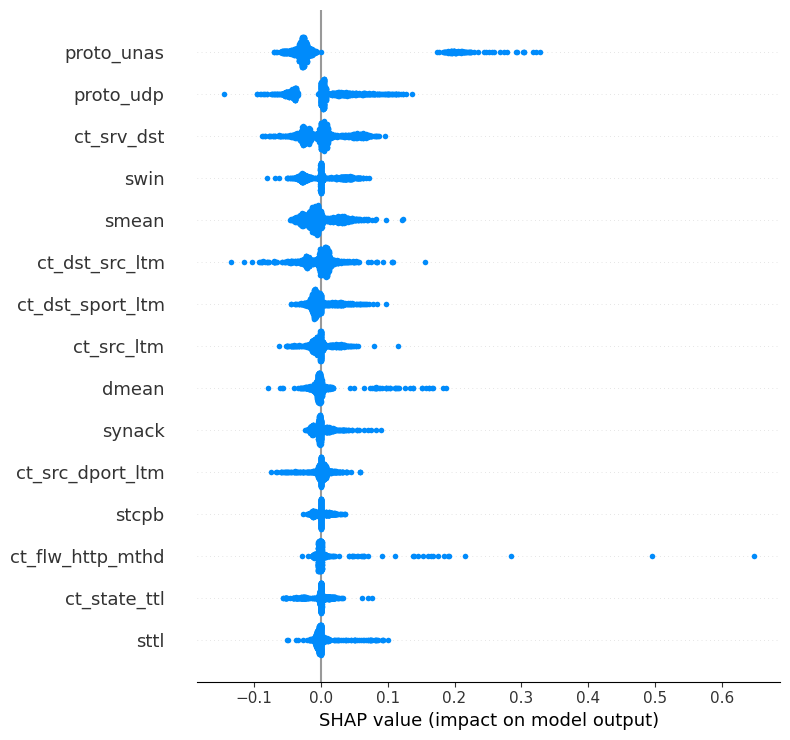

In [11]:
vals = shape_values[0]
# print the summary plot
shap.summary_plot(vals, feature_names= X.columns, max_display=15)

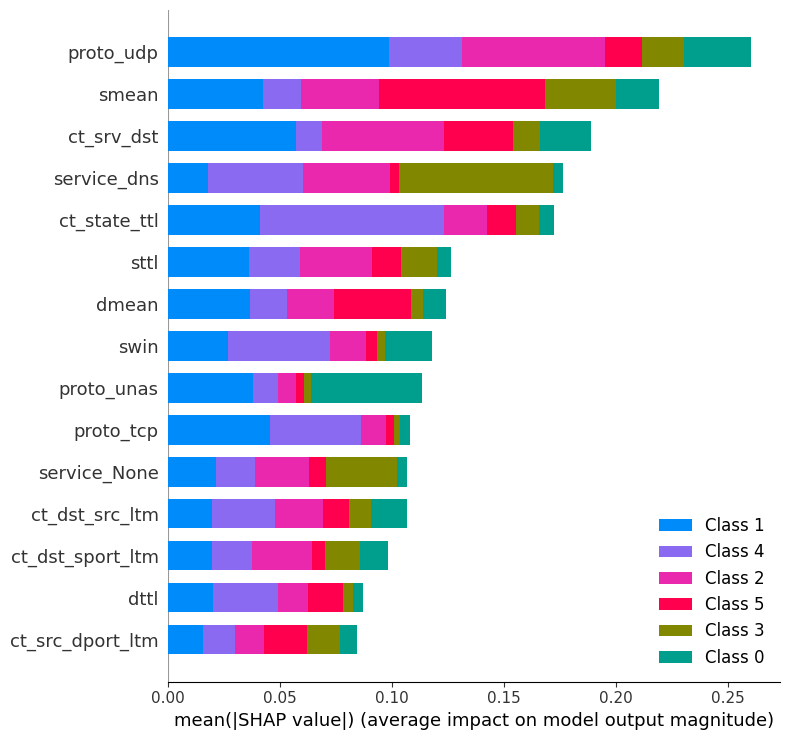

In [12]:
shap.summary_plot(shape_values,X_test2, feature_names= X.columns, max_display=15)

In [13]:
# get top 15 features
top_15 = np.argsort(np.sum(np.abs(vals), axis=0))[-15:]
print(top_15)

df2 = df.copy()
# keep only top 20 features
df2 = df2.iloc[:,top_15]
df2['attack_cat'] = df['attack_cat']
df2

[  6  28  35  17  30  21  24  36  31  32  23  16  37 158 159]


,sttl,ct_state_ttl,ct_flw_http_mthd,stcpb,ct_src_dport_ltm,synack,dmean,ct_src_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,smean,swin,ct_srv_dst,proto_ttp,proto_udp,attack_cat
0,2.440529,1.996613,0.0,0.000000,0.118543,0.000000,0.000000,0.116451,0.165868,0.174422,1.185867,0.000000,0.178725,False,True,4.0
1,2.440529,1.996613,0.0,0.000000,0.118543,0.000000,0.000000,0.116451,0.165868,0.174422,4.212698,0.000000,0.178725,False,True,4.0
2,2.440529,1.996613,0.0,0.000000,0.118543,0.000000,0.000000,0.116451,0.165868,0.261633,2.553440,0.000000,0.268088,False,True,4.0
3,2.440529,1.996613,0.0,0.000000,0.237086,0.000000,0.000000,0.232903,0.165868,0.261633,2.151775,0.000000,0.268088,False,True,4.0
4,2.440529,1.996613,0.0,0.000000,0.237086,0.000000,0.000000,0.232903,0.165868,0.261633,5.082972,0.000000,0.268088,False,True,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557995,2.440529,0.998307,0.0,0.265112,0.118543,0.341690,0.169675,0.116451,0.165868,0.087211,0.267776,2.000058,0.089363,False,False,5.0
557996,2.440529,1.996613,0.0,0.000000,0.118543,0.000000,0.000000,1.979674,0.165868,0.087211,0.401665,0.000000,0.089363,False,True,5.0
557997,2.440529,0.998307,0.0,0.026015,0.226408,0.753369,0.169675,0.222413,0.165868,0.087211,0.267776,2.000058,0.089363,False,False,5.0
557998,2.440529,1.996613,0.0,0.000000,0.118543,0.000000,0.000000,0.232903,0.165868,0.161642,0.401665,0.000000,0.178725,False,True,5.0


In [18]:
# train an lstm model on the data
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn import metrics
X = df2.drop(['attack_cat'], axis=1)
Y = df2[['attack_cat']]
Y['attack_cat'] = Y['attack_cat'].astype('int')
# Y['label'] = Y['label'].astype('int')
# one hot encode attack_cat
Y = pd.get_dummies(Y,columns=['attack_cat'])

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

# convert to numpy array
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

# reshape the data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# convert all to numpy arrays
X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.int32)
X_test = np.asarray(X_test).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.int32)

print(X_train.shape)
# define the model
model = Sequential()
model.add(Conv1D(64, 3,activation="relu",input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(64, 3, activation="relu"))
# model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(128, 3, activation="relu"))
model.add(Conv1D(128, 3, activation="relu"))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(6, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

mc = ModelCheckpoint('shap_cnn_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

start = time.time()
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test), callbacks=[mc])
end = time.time()
print("Time taken to train the model: ", end-start)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(446400, 15, 1)
Epoch 1/10
13932/13950 [============================>.] - ETA: 0s - loss: 0.5597 - accuracy: 0.7909
Epoch 1: val_accuracy improved from -inf to 0.81047, saving model to shap_cnn_best_model.h5
13950/13950 [==============================] - 41s 3ms/step - loss: 0.5597 - accuracy: 0.7909 - val_loss: 0.4904 - val_accuracy: 0.8105
Epoch 2/10
   25/13950 [..............................] - ETA: 59s - loss: 0.4809 - accuracy: 0.8150 

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


13937/13950 [============================>.] - ETA: 0s - loss: 0.4863 - accuracy: 0.8099
Epoch 2: val_accuracy improved from 0.81047 to 0.81492, saving model to shap_cnn_best_model.h5
13950/13950 [==============================] - 43s 3ms/step - loss: 0.4863 - accuracy: 0.8099 - val_loss: 0.4667 - val_accuracy: 0.8149
Epoch 3/10
13949/13950 [============================>.] - ETA: 0s - loss: 0.4666 - accuracy: 0.8152
Epoch 3: val_accuracy improved from 0.81492 to 0.81840, saving model to shap_cnn_best_model.h5
13950/13950 [==============================] - 40s 3ms/step - loss: 0.4666 - accuracy: 0.8152 - val_loss: 0.4497 - val_accuracy: 0.8184
Epoch 4/10
13939/13950 [============================>.] - ETA: 0s - loss: 0.4538 - accuracy: 0.8190
Epoch 4: val_accuracy improved from 0.81840 to 0.82159, saving model to shap_cnn_best_model.h5
13950/13950 [==============================] - 43s 3ms/step - loss: 0.4537 - accuracy: 0.8190 - val_loss: 0.4388 - val_accuracy: 0.8216
Epoch 5/10
13941/1

In [19]:
model = load_model('shap_cnn_best_model.h5')
start = time.time()
y_pred = model.predict(X_test)
end = time.time()
print("Time taken to predict: ", end-start)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

3488/3488 [==============================] - 3s 862us/step
Time taken to predict:  3.715177059173584
              precision    recall  f1-score   support

           0       0.63      0.97      0.76     18639
           1       0.83      0.61      0.70     18534
           2       0.79      0.80      0.80     18672
           3       1.00      0.97      0.98     18497
           4       0.95      0.79      0.86     18721
           5       0.93      0.83      0.88     18537

    accuracy                           0.83    111600
   macro avg       0.85      0.83      0.83    111600
weighted avg       0.85      0.83      0.83    111600

0.8293817204301075


In [20]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Accuracy of each class:')
for i in range(cm.shape[0]):
    print(i, cm[i][i])

Accuracy of each class:
0 0.9687214979344385
1 0.6114708104025035
2 0.8039310197086547
3 0.9720495215440341
4 0.789220661289461
5 0.8309866752980526
